# Analysis of In-Vehicle Coupon Recommendations

#### Jim Beno, for U.C. Berkeley Certificate in Machine Learning & Artificial Intelligence

### Table of Contents

* **[Business Requirements](#Business-Requirements)**
    * [Will a Customer Accept the Coupon?](#Will-a-Customer-Accept-the-Coupon?)
        * [Context](#Context)
        * [Overview](#Overview)
        * [Data](#Data)
        * [Deliverables](#Deliverables)
    * [Data Description](#Data-Description)
    * [Hypotheses for Data Analysis](#Hypotheses-for-Data-Analysis)
* **[Data Assessment](#Data-Assessment)**
    * [Import Libraries](#Import-Libraries)
    * [Load Data](#Load-Data)
    * [Investigate Missing or Problematic Data](#Investigate-Missing-or-Problematic-Data)
        * [Check for Null Values](#Check-for-Null-Values)
        * [Check for Outliers](#Check-for-Outliers)
        * [Look at Unique Values](#Look-at-Unique-Values)
* **[Data Preparation](#Data-Preparation)**
    * [Fix Missing Data](#Fix-Missing-Data)
        * [Drop the Car column](#Drop-the-Car-column)
        * [Drop Remaining Rows with NaNs](#Drop-Remaining-Rows-with-NaNs)
        * [Rename Some Columns](#Rename-Some-Columns)
    * [Variable Transformation and Encoding](#Variable-Transformation-and-Encoding)
        * [Merge Separate Columns](#Merge-Separate-Columns)
        * [Drop Redundant Columns](#Drop-Redundant-Columns)
        * [Binary Variable Encodings](#Binary-Variable-Encodings)
        * [Categorical Variable Encodings](#Categorical-Variable-Encodings)
        * [Normalize Measurement Units](#Normalize-Measurement-Units)
        * [New Features](#New-Features)
        * [Data Processing Steps](#Data-Processing-Steps)
        * [Sanity Check](#Sanity-Check)
        * [One-Hot Encoding](#One-Hot-Encoding)
* **[Data Analysis](#Data-Analysis)**
    * [Plot Variable Distributions](#Plot-Variable-Distributions)
        * [Participant Variables](#Participant-Variables)
    * [Descriptive Statistics](#Descriptive-Statistics)
    * [Explore Correlations](#Explore-Correlations)
        * [Correlation Matrix](#Correlation-Matrix)
            * [Primary Correlations](#Primary-Correlations)
            * [One-Hot Correlations](#One-Hot-Correlations)
        * [Individual Correlation Charts](#Individual-Correlation-Charts)
            * [Accepted Coupon Correlations](#Accepted-Coupon-Correlations)
    * [Targeted Investigations](#Targeted-Investigations)
        * [Coupon Acceptance Rate](#Coupon-Acceptance-Rate)
        * [Temperature](#Temperature)
        * [Bar Coupons](#Bar-Coupons)
            * [Bar Coupon Acceptance Rate](#Bar-Coupon-Acceptance-Rate)
            * [Bar Coupon Acceptance Rate Comparisons](#Bar-Coupon-Acceptance-Rate-Comparisons)
            * [Bar Coupon Acceptance Rate by Age](#Bar-Coupon-Acceptance-Rate-by-Age)
            * [Bar Coupon Conclusions](#Bar-Coupon-Conclusions)
        * [Coffee Coupons](#Coffee-Coupons)
            * [Coffee Coupon Acceptance Rate](#Coffee-Coupon-Acceptance-Rate)
            * [Coffee Coupon Correlations](#Coffee-Coupon-Correlations)
            * [Coffee Coupon Acceptance Rate vs. Visit Frequency](#Coffee-Coupon-Acceptance-Rate-vs.-Visit-Frequency)
            * [Coffee Coupon Acceptance Rate vs. Destination](#Coffee-Coupon-Acceptance-Rate-vs.-Destination)
            * [Coffee Coupon Acceptance Rate vs. Age and Gender](#Coffee-Coupon-Acceptance-Rate-vs.-Age-and-Gender)
            * [Coffee Coupon Conclusions](#Coffee-Coupon-Conclusions)
* **[Summary of Findings](#Summary-of-Findings)**
    * [Participant Demographics](#Participant-Demographics)
    * [General Correlations](#General-Correlations)
    * [Coupon Acceptance](#Coupon-Acceptance)
    * [Bar Coupons](#Bar-Coupons)
    * [Coffee Coupons](#Coffee-Coupons)
    * [Hypotheses Evaluation](#Hypotheses-Evaluation)
    * [Limitations](#Limitations)
    * [Next Steps and Recommendations](#Next-Steps-and-Recommendations)

# Business Requirements

## Will a Customer Accept the Coupon?

### Context

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

### Overview

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

### Data

This data comes to us from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation) and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

### Deliverables

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 

## Data Description

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

## Hypotheses for Data Analysis

Given the description of the dataset, and what we know about the world, I can imagine a number of variables might have relationships with each other. We can test these for correlations later.

* People that **frequent bars** more often are more likely to accept a bar coupon
* People with **lower income** are more likely to accept a coupon for lower-cost restaurants
* **Bad weather** would decrease the probability of accepting a coupon
* People that **often buy take-out** would more likely accept a take-out copon
* People that **frequent coffee shops** would be more likely to accept a coffee coupon
* People **driving alone** would be more likely to accept a coupon for a bar in 2 hours
* People **driving with kids** would be more likely to accept a coupon for a cheap restaurant in 2 hours
* **Close proximity** would increase the chance of accepting a coupon in 2 hours
* **No urgent destination** would increase the chance of accepting a coupon in 2 hours
* People that are **unemployed** would be more likely to accept a coupon

# Data Assessment

## Import Libraries

In addition to the usual libraries, I created a helper library that has some functions I use, it's imported as **myfunctions** as **my**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import mytools as my

## Load Data

First step is to load the data and examine it. I'm using a few functions to do this:

* Scan the columns and values using `df.head()` and `df.tail()`
* In case there are too many columns, I set `pd.set_option('display.max_columns', None)` to "None" which is no limit. Now I can see if any column values need cleaning or processing.

In [2]:
# Read in the data in CSV format
df = pd.read_csv('data/coupons.csv')

In [3]:
# Set the display to maximum columns so we don't miss anything
pd.set_option('display.max_columns', None)

# Show the first few records of data, and visually scan them
df.head()
# Show the last few records of data, and visually scan them
#df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## Investigate Missing or Problematic Data

### Check for Null Values

Next we need to see what kind of variables we're looking at, and how many null values we have. I'll use `df.info()` for this.

In [4]:
# Look at the info for each column, especially the non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
&#x1F50D; <b>Observation:</b> The "car" column only has 108 non-null values, most of this data is missing. We will likely have to drop this column from our analysis. If we keep it and drop all NaN's, we'll lose the majority of our dataset. Also, "passanger" is not spelled correctly, and the column naming format is inconsisent. We will clean this up later.
</div>

### Check for Outliers

To check for outliers, I'll look at the descriptive statistics for numerical values with `df.describe()`, and look at the maximum and minimum values compared to the Interquartile Range. (I will look for outliers in charts later, this is just a quick check at the beginning)

In [5]:
# Look for extreme outliers in the quantitative data
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Look at Unique Values

Let's take a closer look at the values of each variable. To start, I run `df.unique()` to find the number of unique values for each variable. This gives me clues to which ones are categorical vs. continuous numerical. 

In [6]:
# Get a count of unique values for each variable
df.nunique(axis=0)

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
&#x1F50D; <b>Observation:</b> Based on these counts, it looks like all the variables here are qualitative (categorical). Maybe some are on an ordinal scale. But it doesn't appear that any are continuous numerical values, which limits the type of analysis we can do.
</div>

I don't want to look at the unique values for the continuous variables, but I do want to look at this for others. I initially started doing this by hand, typeing `df['name'].unique()` for each variable. But I wrote a little function called `my.get_unique()` ([GitHub](https://github.com/jbeno/mytools/tree/main)) that iterates through each variable that has a unique value count below a specified threshold. It then displays the unique values indented in plain text.

In [7]:
# Run my custom helper function to show the unique values of each variable
my.get_unique(df, 25, count=True, percent=True) # Original
#my.get_unique(df_clean, 25, count=True, percent=True) # Cleaned (processed later)
#my.get_unique(df_enc, 25, count=True, percent=True) # Encoded (processed later)


CATEGORICAL: Variables with unique values equal to or below: 25

destination has 3 unique values:

	No Urgent Place       6283   49.53%
	Home                  3237   25.52%
	Work                  3164   24.94%

passanger has 4 unique values:

	Alone           7305   57.59%
	Friend(s)       3298   26.0%
	Partner         1075   8.48%
	Kid(s)          1006   7.93%

weather has 3 unique values:

	Sunny       10069   79.38%
	Snowy       1405    11.08%
	Rainy       1210    9.54%

temperature has 3 unique values:

	80       6528   51.47%
	55       3840   30.27%
	30       2316   18.26%

time has 5 unique values:

	6PM        3230   25.47%
	7AM        3164   24.94%
	10AM       2275   17.94%
	2PM        2009   15.84%
	10PM       2006   15.82%

coupon has 5 unique values:

	Coffee House                3996   31.5%
	Restaurant(<20)             2786   21.96%
	Carry out & Take away       2393   18.87%
	Bar                         2017   15.9%
	Restaurant(20-50)           1492   11.76%

expiration h

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
&#x1F50D; <b>Observation:</b> A number of the values are NaN's. Aside from the "car" column (which we know is problematic), the rest don't have that many. We should be able to drop those. There is also some unique syntax used to represent some of the survey options. I am not sure at this stage if we need to modify any of them. We could possibly convert some of these items to an ordinal scale. 
</div>

# Data Preparation

## Fix Missing Data

### Drop the Car column

An obvious problem stands out: the "car" field only has 108 populated values, almost all of the data is missing. If this had at least half the values, maybe we could retain it and populate the missing values with means or medians. But 108 records is less than 1% of the data set, so I think it's best to just drop this column entirely. 

Upon looking at the unique value counts above, we can see some values have been populated, roughly equally at either 21 or 22 responses each. This is also odd. I'm really curious why the car field was not filled out by everyone in the survey. Perhaps something went wrong with the data, or perhaps most of the participants left it blank because they didn't have a car. We don't know definitively, so the safest approach is to drop the column and not analyze this field.

In [8]:
# Create a copy of the dataframe for cleaning, and drop the car column
df_clean = df.drop('car', axis=1)

In [9]:
# Check to make sure it's gone
#df_clean.info()

### Drop Remaining Rows with NaNs

Of the remaining variables, just 5 of them have null values:

In [10]:
# Print the columns that have null counts greater than 0, with the number of NaNs
null_counts = df_clean.isna().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64


They are all relatively small numbers, so we'll drop the rows that have these, and see how much this impacted our total dataset.

In [11]:
# Drop all rows that have a null value (nan)
df_clean = df_clean.dropna()

In [12]:
# Check to see if every column has the same number of non-null values as the total entries
#df_clean.info()

In [13]:
# Evaluate impact on data set
data_retention = len(df_clean) / len(df) * 100
print(f"Amount of original data set retained after cleaning: {data_retention:.2f}%")

Amount of original data set retained after cleaning: 95.23%


<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
&#x1F50D; <b>Observation:</b> We still have 95.23% of our original data set intact. We have 12,079 records vs. the original 12,684 (a loss of 605 records), so the cleaning has had minimal impact. 
</div>

### Rename Some Columns

The "passangar" column is mispelled, so we'll rename it correctly as "passenger". Some columns have inconsistent capitalization. We'll clean this up to make it easier for us to do the analysis.

In [14]:
# Rename the 'passanger' column to 'passenger' and rename others for consistency/clarity
df_clean.rename(columns={'passanger':'passenger',
                         'maritalStatus':'marital_status',
                         'Bar':'bar',
                         'CoffeeHouse':'coffee_house',
                         'CarryAway':'carry_away',
                         'RestaurantLessThan20':'restaurant_less_than_20',
                         'Restaurant20To50':'restaurant_20_to_50',
                         'toCoupon_GEQ5min':'distance_5_mins',
                         'toCoupon_GEQ15min':'distance_15_mins',
                         'toCoupon_GEQ25min':'distance_25_mins',
                         'Y':'accepted_coupon'
                        }, inplace=True)

In [15]:
# Compare the results of our changes
old_index = pd.Index(df.columns)
new_index = list(df_clean.columns)
car_position = old_index.get_loc('car')
new_index.insert(car_position, '')
df_comparison = pd.DataFrame({'OLD COLUMNS' : old_index, 'NEW COLUMNS' : new_index})
#print(df_comparison)

## Variable Transformation and Encoding

There are a few things I'd like to modify in this dataset to facilitate correlations:

### Merge Separate Columns

* **Distance** is coded across 3 separate columns. One of them, "distance_5_mins" has the same value (1) for all records. From reading the data description, participants were shown a map that indicated the distance to the coupon establishment. This distance is coded as 3 separate values: 5 mins away, 15 mins away, or 25 mins away. But this is clearly representing a single scale of progressively increasing distance. I'd like to merge these into one column that is calculated as follows:
    * distance_5_mins: **1**, distance_15_mins: **0**, distance_25_mins: **0** = **distance: 5**
    * distance_5_mins: **1**, distance_15_mins: **1**, distance_25_mins: **0** = **distance: 15**
    * distance_5_mins: **1**, distance_15_mins: **1**, distance_25_mins: **1** = **distance: 25**

### Drop Redundant Columns

* **Direction** is coded across 2 separate columns: direction_same, direction_opp (both with Yes = 1, No = 0). They are the inverse of each other. I would merge them, but "direction_same" already represents the merged state (same = 1, opposite = 0). So I will **drop "direction_opp".**

### Binary Variable Encodings

* **Gender** has values of "Male" and "Female", but I'd like to explore correlations with it, so its binary values (male = 0, female = 1) will be added as a new column called "gender_enc". I'll retain the original column for categorical and other dimensioning.
    * Male: **0**
    * Female: **1**

### Categorical Variable Encodings

Some of these variables are recorded as nominal categorical values that represent a numeric range. I will convert them to a numeric scale that represents the lower edge of each range. It is more fidelity than pure nominal values, but we don't know if this is the actual value each record had. We can only say "it's at least this value".
* **Income** will be converted as follows in a new column called "income_enc":
    * Less than \\$12500: **1**
    * \\$12500 - \\$24999: **12500**
    * \\$25000 - \\$37499: **25000**
    * \\$37500 - \\$49999: **37500**
    * \\$50000 - \\$62499: **50000**
    * \\$62500 - \\$74999: **62500**
    * \\$87500 - \\$99999: **87500**
    * \\$75000 - \\$87499: **75000**
    * \\$100000 or More: **100000**
* **Age** will be converted as follows in a new column called "age_enc". The mapping for "below21" is a judgement call. 1 doesn't make sense, 18 is probably the lower end of the range if we're talking about legal drivers, so I mapped it to 18.
    * below21: **18**
    * 21: **21**
    * 26: **26**
    * 31: **31**
    * 36: **36**
    * 41: **41**
    * 46: **46**
    * 50plus: **50**
* **Visit Frequencies** – A number of the variables are responses to a survey asking how frequently they visit certain types of restaurants, bars, coffee shops, or get take-out (carry away). I will retain the original categorical values, but create a new variable that has the closest numeric match (low end of each range) for correlations:
    * **Bar** will be converted as follows in a new column called "bar_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Coffee House** will be converted as follows in a new column called "coffee_house_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Carry Away** will be converted as follows in a new column called "carry_away_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Restaurant Less Than 20** will be converted as follows in a new column called "restaurant_less_than_20_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    * **Restaurant 20 to 50** will be converted as follows in a new column called "restaurant_20_to_50_enc":
        * never: **0**
        * less1: **0**
        * 1~3: **1**
        * 4~8: **4**
        * gt8: **8**
    
<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
&#x1F446; <b>Note:</b> These conversions lose some fidelity with "never" and "less1" both becoming 0. "less1" represents 16% to 48% of the responses, depending on the variable. But as mentioned, we will only use this to look for correlations. The original nominal categories will be retained for other charts.
</div>
 

### Normalize Measurement Units

* **Expiration** has 2 values, one in hours (2h), and one in days (1d). I will convert these to hours and drop the "h" and "d" so it can be a pure numeric value in a new column "expiration_enc":
    * 2h: **2**
    * 1d: **24**
* **Time** is coded using both AM and PM, but we can convert to 24 hour time as a new column "time_enc":
    * 7AM: **7**
    * 10AM: **10**
    * 2PM: **14**
    * 6PM: **18**
    * 10PM: **22**

### New Features

* **Employed** (yes or no) is not called out as a separate variable, but we can extract this from the "Occupation" column to get a binary value for a new column "employed" as follows: 
    * Occupation = Unemployed or Student or Retired: **0**
    * Occupation != Unemployed or Student or Retired: **1**
* **Education Years** – "Education" has nominal categorical values, but they represent a progression from no education, through high school, college, masters or PhD. So we can experiment with converting these to an some type of numeric values. We could use an ordinal scale to rank these. But we know how many years are associated with each of these levels, approximately, and can use the estimated years of education each represents in a cumulative manner as a new field called "education_years":
    * Some High School: **2**
    * High School Graduate: **4**
    * Some college - no degree: **6**
    * Associates degree: **6**
    * Bachelors degree: **8**
    * Graduate degree (Masters or Doctorate): **10**

### Data Processing Steps

I'll now create a duplicate of the dataframe as `df_enc` and drop the columns noted above. After creating the mappings using dictionaries, I'll then add new columns to this dataframe using `df.map()`, passing the dictionary mappings. I'll then query the first 20 rows of all the associated columns for a sanity check.

In [16]:
# Create a copy of the dataframe for encoding, and drop the "direction_opp" column
df_enc = df_clean.drop('direction_opp', axis=1)

In [17]:
# Examine the distance columns and verify they can be transformed as planned
#df_clean[['distance_5_mins', 'distance_15_mins','distance_25_mins']]

# Create a "distance" column that is the sum of the other 3 columns
df_enc['distance'] = df_enc[['distance_5_mins', 'distance_15_mins', 'distance_25_mins']].apply(lambda x: sum(x), axis=1)

# Verify the sum is calculated correctly
#df_enc[['distance_5_mins', 'distance_15_mins','distance_25_mins','distance']]
#df_enc['distance'].unique()

# Map the interim sum values to the new values as planned
distance_map = {1:5, 2:15, 3:25}
df_enc['distance'] = df_enc['distance'].map(distance_map)

# Verify the changes
#df_enc[['distance_5_mins', 'distance_15_mins','distance_25_mins','distance']]

# Drop the old columns
df_enc = df_enc.drop(['distance_5_mins','distance_15_mins','distance_25_mins'], axis=1)

#Verify the changes
#df_enc.info()

In [18]:
# Map the value changes for gender
gender_map = {'Male':0, 'Female':1}

# Apply the map and create a new column "gender_enc"
df_enc['gender_enc'] = df_enc['gender'].map(gender_map)

In [19]:
# Map the value changes for income
income_map = {'Less than $12500': 1,
              '$12500 - $24999': 12500,
              '$25000 - $37499': 25000,
              '$37500 - $49999': 37500,
              '$50000 - $62499': 50000,
              '$62500 - $74999': 62500,
              '$87500 - $99999': 87500,
              '$75000 - $87499': 75000,
              '$100000 or More': 100000}

# Apply the map and create a new column "income_enc"
df_enc['income_enc'] = df_enc['income'].map(income_map)

In [20]:
# Map the value changes for age
age_map = {'below21': 18,
           '21': 21,
           '26': 26,
           '31': 31,
           '36': 36,
           '41': 41,
           '46': 46,
           '50plus': 50}

# Apply the map and create a new column "age_enc"
df_enc['age_enc'] = df_enc['age'].map(age_map)

In [21]:
# Map the value changes for time
time_map = {'7AM': 7,
           '10AM': 10,
           '2PM': 14,
           '6PM': 18,
           '10PM': 22}

# Apply the map and create a new column "time_enc"
df_enc['time_enc'] = df_enc['time'].map(time_map)

In [22]:
# Map the value changes for expiration
expiration_map = {'2h': 2, '1d': 24}

# Apply the map and create a new column "expiration_enc"
df_enc['expiration_enc'] = df_enc['expiration'].map(expiration_map)

In [23]:
# Map the value changes for bar, coffee_house, carry_away, restaurant_less_than_20, restaurant_20_to_50
freq_map = {'never': 0,
            'less1': 0,
            '1~3': 1,
            '4~8': 4,
            'gt8': 8}

# Apply the frequency map and create a new column "bar_enc"
df_enc['bar_enc'] = df_enc['bar'].map(freq_map)

# Apply the frequency map and create a new column "coffee_house_enc"
df_enc['coffee_house_enc'] = df_enc['coffee_house'].map(freq_map)

# Apply the frequency map and create a new column "carry_away_enc"
df_enc['carry_away_enc'] = df_enc['carry_away'].map(freq_map)

# Apply the frequency map and create a new column "restaurant_less_than_20_enc"
df_enc['restaurant_less_than_20_enc'] = df_enc['restaurant_less_than_20'].map(freq_map)

# Apply the frequency map and create a new column "restaurant_20_to_50_enc"
df_enc['restaurant_20_to_50_enc'] = df_enc['restaurant_20_to_50'].map(freq_map)

In [24]:
# List the values from "occupation" that represent "unemployed"
unemployed_list = ['Unemployed','Student','Retired']

# Create a new column for "employed" based on the occupation value mappings 
df_enc['employed'] = df_enc['occupation'].apply(lambda x: 0 if x in unemployed_list else 1)

In [25]:
# Map the value changes to conver "education" to "education_years"
education_map = {'Some High School': 2,
                 'High School Graduate': 4,
                 'Some college - no degree': 6,
                 'Associates degree': 6,
                 'Bachelors degree': 8,
                 'Graduate degree (Masters or Doctorate)': 10}

# Apply the frequency map and create a new column "bar_enc"
df_enc['education_years'] = df_enc['education'].map(education_map)

### Sanity Check

To make sure everything was transformed correctly, need to do a sanity check by looking at some rows from the new dataframe (first, last, and a random sample using `df.sample()`. Then I'll check for any nulls or NaNs in each column by using `df.isna().sum()`

In [26]:
# Sanity check the results by reviewing the affected columns for the first 20 rows, and a random sample
encoded_field_sets = ['gender','gender_enc',
                      'age','age_enc',
                      'income','income_enc',
                      'time','time_enc',
                      'expiration','expiration_enc',
                      'bar','bar_enc',
                      'coffee_house','coffee_house_enc',
                      'carry_away','carry_away_enc',
                      'restaurant_less_than_20','restaurant_less_than_20_enc',
                      'restaurant_20_to_50','restaurant_20_to_50_enc',
                      'occupation','employed',
                      'education','education_years',
                      'distance']

#df_enc[:20][encoded_field_sets]
#df_enc[-20:][encoded_field_sets]
#df_enc[encoded_field_sets].sample(10)

In [27]:
# Double-check for any nulls/NaNs as a result of our transformations or encodings
#df_enc.isna().sum()

In [28]:
# Now we can drop the old columns from df_enc, since we still have them in df_clean if needed
encoded_fields_orig = ['gender',
                      'age',
                      'income',
                      'time',
                      'expiration',
                      'bar',
                      'coffee_house',
                      'carry_away',
                      'restaurant_less_than_20',
                      'restaurant_20_to_50']

df_enc = df_enc.drop(encoded_fields_orig, axis=1)

In [29]:
# Show the results of the encodings, we have a new list of unique values
#my.get_unique(df_enc, 25, count=True, percent=True)

In [30]:
# Lets see how manu numeric variable types we have in total
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   destination                  12079 non-null  object
 1   passenger                    12079 non-null  object
 2   weather                      12079 non-null  object
 3   temperature                  12079 non-null  int64 
 4   coupon                       12079 non-null  object
 5   marital_status               12079 non-null  object
 6   has_children                 12079 non-null  int64 
 7   education                    12079 non-null  object
 8   occupation                   12079 non-null  object
 9   direction_same               12079 non-null  int64 
 10  accepted_coupon              12079 non-null  int64 
 11  distance                     12079 non-null  int64 
 12  gender_enc                   12079 non-null  int64 
 13  income_enc                   1

<div style="background-color: #e8f3ff; border: 1px solid #aecae8; padding: 10px; border-radius: 3px;">
&#x1F50D; <b>Observation:</b> All the encodings or transformations look good in the random sample above. We now have a much larger set of numerical variables in this data set that we can evaluate with correlations. "df_enc" has <b>17 int64 variables</b>, whereas the original "df" dataset had just 5 int64 variables (when dropping redundant columns, otherwise the original dataset had 8 int64).
</div>

### One-Hot Encoding

Some of the variables are purely categorical, but I'd still like to see if there is a strong associate with the presence of one value vs. other variables. To enable this, I will create a separate column for each value, and indicate the presence of that option with a 1 or 0. These variables are:

* **Destination**
* **Passenger**
* **Weather**
* **Coupon**
* **Marital Status**
* **Occupation**


We will create a separate dataframe for this called `df_onehot`, since it will bloat the dataset quite significantly.

In [31]:
# Create list of remaining categorical columns to one-hot encode
onehot_columns = ['destination',
                  'passenger',
                  'weather',
                  'coupon',
                  'marital_status',
                  'occupation']

# Create new dataframe using pd.get_dummies to encode categorical values into separate columns
df_onehot = pd.get_dummies(df_enc, columns=onehot_columns, prefix={'destination':'dest',
                                           'passenger':'pass',
                                           'weather':'weat',
                                           'coupon':'coup',
                                           'marital_status':'mari',
                                           'occupation':'occu'}, drop_first=False)

In [32]:
#df_onehot.info()

<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
    &#x1F446; <b>Note:</b> This one-hot encoding of categorical values is experimental here, which is why I've added this on after my sanity check, and as a separate dataframe. I know this is a technique used to allow models to learn from categorical data. But in this project, I am using it to evaluation correlations, and I am not certain of the right approach to assess correlations with this kind of data (I have not learned this yet).
</div>

# Data Analysis

## Plot Variable Distributions

Next step is to start visualizing some of the data. I like to plot the distributions for all the variables. Originally I was doing this by just creating a PairPlot, but I found it hard to read the histograms, and it became a giant cumbersome chart. So I created a function called `my.plot_charts` ([GitHub](https://github.com/jbeno/mytools/tree/main)) that just outputs a bunch of Seaborn bar charts or histograms in a layout.

I'm splitting the variables into 2 datasets: one for demographic data, and one for participant variables.

In [33]:
# Separate the participant variables from the survey scenario variables
scenario_variables = ['destination',
                         'passenger',
                         'weather',
                         'temperature',
                         'coupon',
                         'direction_same',
                         'accepted_coupon',
                         'distance',
                         'time_enc',
                         'expiration_enc']

# Participant variables minus "occupation" which we'll plot separately
participant_variables = ['marital_status',
                         'has_children',
                         'education',
                         'gender_enc',
                         'income_enc',
                         'age_enc',
                         'bar_enc',
                         'coffee_house_enc',
                         'carry_away_enc',
                         'restaurant_less_than_20_enc',
                         'restaurant_20_to_50_enc',
                         'employed',
                         'education_years']

# Create new dataframes from "df_enc" that contain just the above variable lists
df_part = df_enc[participant_variables].copy()
df_scen = df_enc[scenario_variables].copy()

In [34]:
# Verify the split
#df_part.info()
#df_scen.info()

### Participant Variables

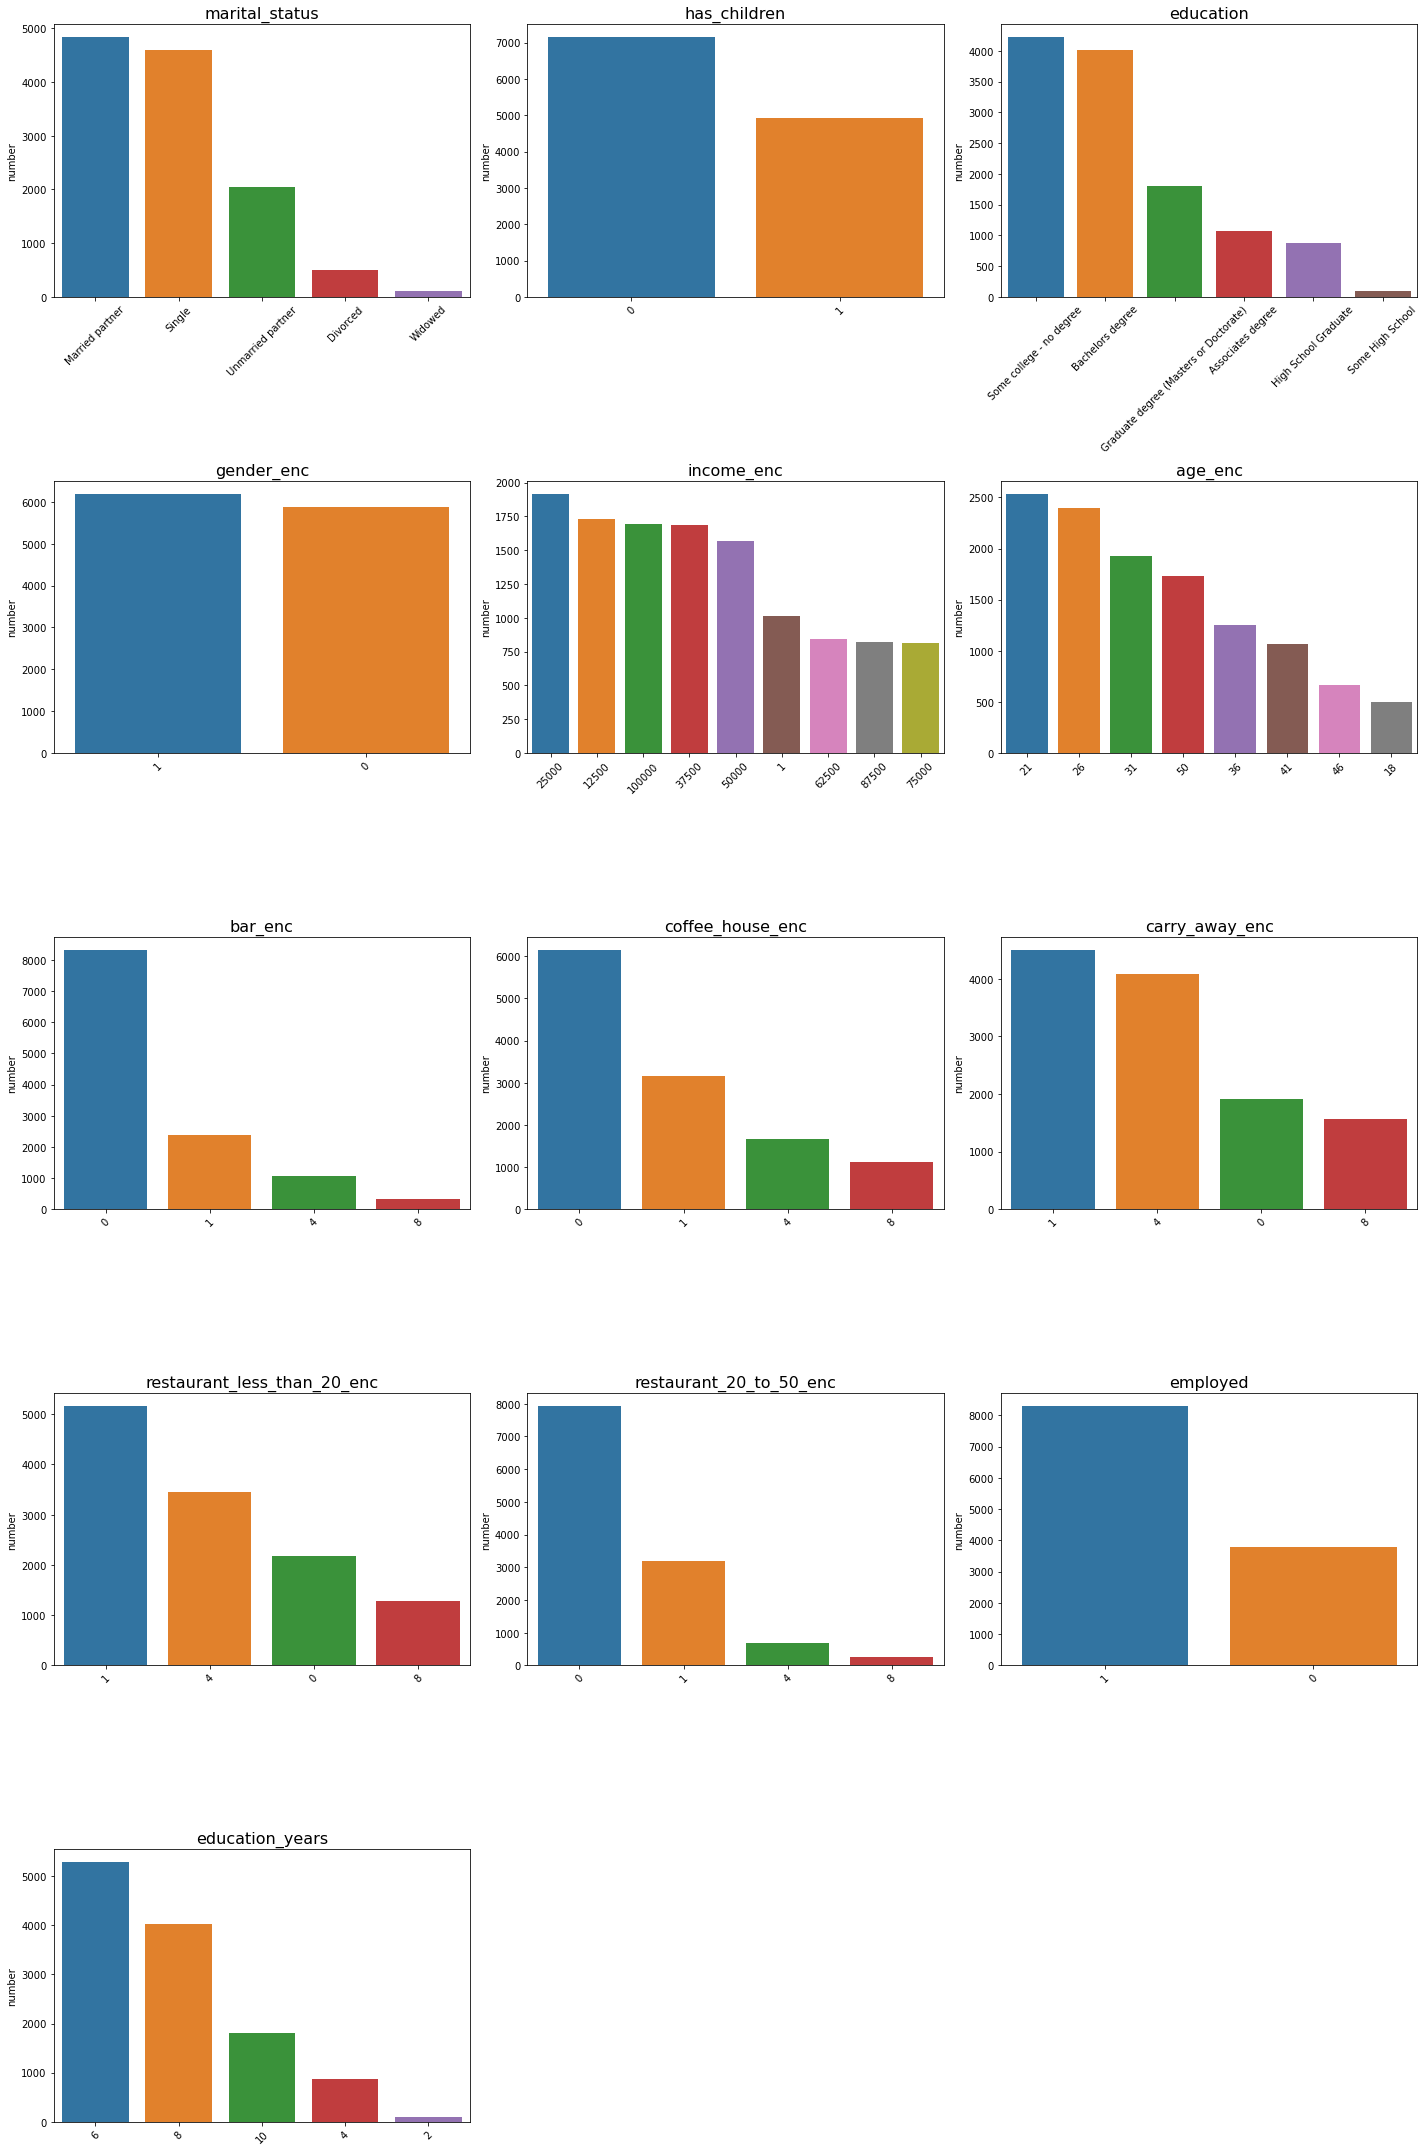

In [35]:
# Run a custom helper function that plots distribution charts 
my.plot_charts(df_part, n=25, figsize=(20,30))

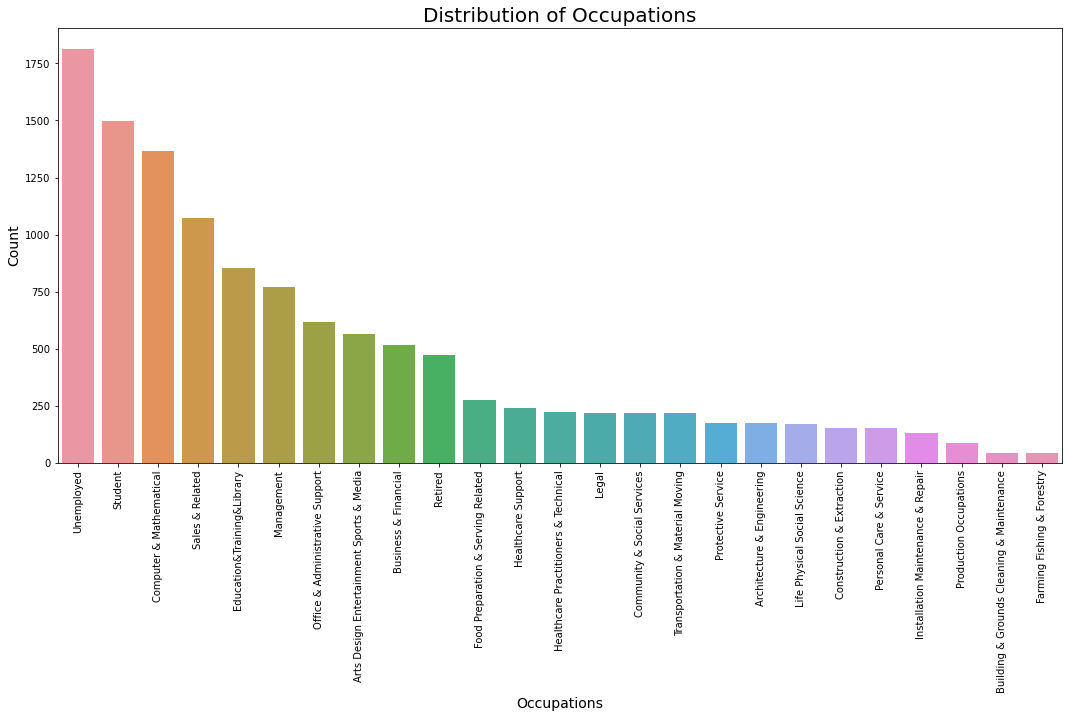

In [36]:
# Separate chart for Occupation since it's so wide
occ_number = df_clean['occupation'].value_counts(dropna=False)
occ_name = [str(n) for n in occ_number.index]
occ_uv = pd.DataFrame({'name':occ_name, 'number':occ_number})     
occ_number = df_clean['occupation'].value_counts(dropna=False)
plt.figure(figsize=(18,8))
sns.barplot(data=occ_uv, x='name', y='number', order=occ_uv.sort_values('number', ascending=False).name)
plt.title('Distribution of Occupations', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupations', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> We've learned a few things about the <b>participants</b> in this survey from the plots above:
    <ul>
        <li>Most participants were <b>Employed</b> (68.67%)
        <li>A number of them were Unemployed (15.02%) or Students (12.39%) or Retired (3.92%)
        <li><b>Computer & Mathematical</b> was the top occupation (11.33%) for those employed
        <li>Most had <b>Some College</b> (34.93%) or a <b>Bachelor's degree</b> (33.29%)
        <li>Most had an income in the range of <b>\$25,000 - \$37,499</b> (15.87%)
        <li>Most were in the <b>between the Ages of 21-30</b> (41%)
        <li>There's about an even split between Married (40%) and Single (37.98%)
        <li>It was also an even split between Males (48.68%) and Females (51.32%)
        <li>Most had <b>no children</b> (59.15%)
        <li>Most <b>never went to bars</b> (40.97%)
        <li>Most went to <b>cheap restaurants 1-3 times a month</b> (42.38%)
        <li>Most went to <b>\$20-\$50 restaurants less than once a month</b> (47.91%)
    </ul>
</div>

In [37]:
# Run a custom helper function that plots distribution charts
#my.plot_charts(df_scen, n=25, figsize=(20,20))

## Descriptive Statistics

Now that we've encoded some of our variables numerically, let's also take a second look at the descriptive statistics to see if we've learned anything new.

In [38]:
# Re-run descriptive statistics on numerical variables in our "def_enc" dataframe
df_enc.describe()

,temperature,has_children,direction_same,accepted_coupon,distance,gender_enc,income_enc,age_enc,time_enc,expiration_enc,bar_enc,coffee_house_enc,carry_away_enc,restaurant_less_than_20_enc,restaurant_20_to_50_enc,employed,education_years
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,0.408478,0.215167,0.569335,11.806027,0.513205,46815.838563,32.313519,13.812567,14.312278,0.761818,1.546734,2.766620,2.420979,0.666446,0.686729,7.090156
std,19.133246,0.491573,0.410955,0.495190,6.754124,0.499846,31945.817437,10.336641,5.408619,10.921896,1.656745,2.440030,2.542031,2.438281,1.458061,0.463843,1.716175
min,30.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,18.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,55.000000,0.000000,0.000000,0.000000,5.000000,0.000000,25000.000000,21.000000,7.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000
50%,80.000000,0.000000,0.000000,1.000000,15.000000,1.000000,37500.000000,31.000000,14.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.000000
75%,80.000000,1.000000,0.000000,1.000000,15.000000,1.000000,75000.000000,41.000000,18.000000,24.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000
max,80.000000,1.000000,1.000000,1.000000,25.000000,1.000000,100000.000000,50.000000,22.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,10.000000


<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> We've learned a few things from these descriptive statistics: the median income was $37,500, and the median age was 31. Remember that the converted categories are mapped to the low end of the category range:
</div>

## Explore Correlations

### Correlation Matrix

Now it's time to start looking at relationships between variables. We have a number of hypotheses about things that could impact Coupon Acceptance. But do we see evidence of that in the data?
* The simplest way to start is to run `df_enc.corr()` across all the numeric variables, including the ones I just encoded (minus the one-hot encodings). I'm rounding the decimels up to 2
* I'll then plot the `corr` dataframe using a Seaborn heatmap `sns.heatmap()`. I like to use the "RdYlGn" color map with "vmin" set to -1, and "vmax" set to 1. This way the strongest negative correlations are solid red, and the strongest positive correlations are solid green. Everything in the middle is yellow (or orange and light green).

#### Primary Correlations

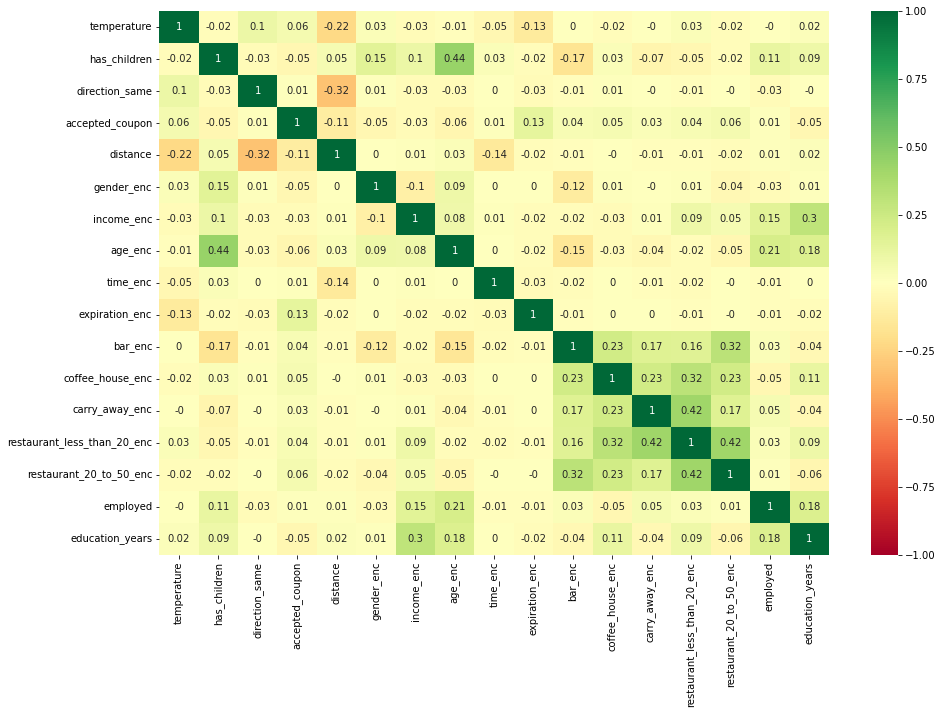

In [39]:
# Create the correlation, rounding decimels to 2
corr_enc = round(df_enc.corr(numeric_only=True), 2)

# Plot the correlation using sns.heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_enc, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> Here's what we learned from the correlation matrix above:
    <ul>
        <li>The strongest positive correlation is between <b>Age and Has Children</b>, it's moderate at <b>0.44</b>. This is not suprising, the older you are, the more likely you are to have children.
        <li>The strongest negative correlation is between <b>Distance and Direction</b>, it's moderate at <b>-0.32</b>. This is between 2 scenario variables, and not a participant's response to a scenario variable, so not very meaningful (I'll exclude any other correlations between survey scenario variables)
        <li><b>Income and Education Years</b> had a moderate positive correlation at <b>0.3</b>
        <li><b>Age and Employed</b> had a weak positive correlation at <b>0.21</b>
        <li><b>Age and Education Years</b> had a weak positive correlation at <b>0.18</b>
        <li><b>Bar and Has Children</b> had a weak negative correlation at <b>-0.17</b>, suggesting people with children frequent bars less
        <li><b>Bar and Age</b> had a weak negative correlation at <b>-0.15</b>, suggesting younger people frequent bars more often
    </ul>
</div>

#### One-Hot Correlations

I'll next produce a correlation matrix that includes every variable encoded numerically, using our one-hot dataframe: "df_onehot". I'm commenting this out since it's so massive, but feel free to uncomment and re-run it. From this, I was able to identify some interesting correlations.

In [40]:
# Create the correlation, rounding decimels to 2
corr_onehot = round(df_onehot.corr(numeric_only=True), 2)

# NOTE: Not shown due to size, but uncomment to review
# Plot the correlation using sns.heatmap
#plt.figure(figsize=(60, 40))
#sns.heatmap(corr_onehot, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
#plt.show()

### Individual Correlation Charts

The heatmap matrix is nice to scan broadly for things of interest. But when presenting the correlation results, I didn't find a way to show just one slice of the heatmap (other than cropping a screenshot of it). It seemed like a good idea to summarize the correlations for one variable (against all others) on a bar chart. So I created a function called `my.plot_corr` ([GitHub](https://github.com/jbeno/mytools/tree/main)) that does this.

Every chart is on a fixed y axis from -1 to 1, so visually you can compare/contrast one chart with another to see where there are stronger vs. weaker correlations.

#### Accepted Coupon Correlations

In [41]:
# Show the correlations just for "accepted_coupon" so we can see the extreme positives and negative
#corr_onehot[['accepted_coupon']].sort_values(by='accepted_coupon', ascending=False)

# Create a dataframe that just has the columns we now know are correlated with "accepted_coupon" (just the top ones)
df_accepted_coupon = df_onehot[['accepted_coupon','coup_Carry out & Take away','coup_Restaurant(<20)','expiration_enc','pass_Friend(s)','weat_Sunny','dest_Work','coup_Restaurant(20-50)','pass_Alone','coup_Coffee House','distance','coup_Bar']]

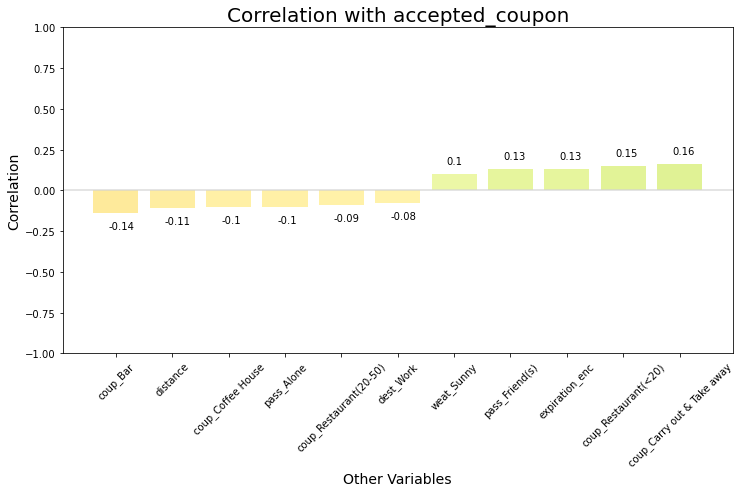

In [42]:
# Use a custom function to plot a chart showing the correlations with "accepted_coupon" (just the top ones)
my.plot_corr(df_accepted_coupon, 'accepted_coupon', size=(12,6))

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> Here's what we learned about <b>Accepted Coupon</b> (Yes or No) our main variable of interest:
    <ul>
        <li><b>Carry Out Coupons</b> had a weak positive correlation at <b>0.16</b>, suggesting people were more likely to accept a coupon for take-out. It's probably easier to be spontaneous for picking up take-out vs. a dine-in experience. This was the <b>strongest positive correlation</b> with coupon acceptance.
        <li><b>Cheap Restaurants</b> had a weak positive correlation at <b>0.15</b>, contrasting with <b>Restaurants \$20-\$50</b>, which had a weak negative correlation at <b>-0.09</b>. This suggests people were more likely to accept a coupon for cheap vs. more expensive restaurants.
        <li><b>Expiration</b> had a weak positive correlation at <b>0.13</b>, meaning people were more likely to accept a coupon if they had more time before it expired.
        <li><b>Friend as a Passenger</b> had a weak positive correlation at <b>0.13</b>, contrasting with <b>Driving Alone</b>, which had a weak negative correlation at <b>-0.1</b>. This suggests people were more likely to accept a coupon if they had a friend in the passenger seat vs. being alone. Perhaps it would viewed as a fun thing to do with a friend.
        <li><b>Sunny Weather</b> had a weak positive correlation at <b>0.1</b>, which suggests a slight tendency to accept coupons more if it was sunny out.
        <li><b>Bar Coupons</b> had a weak negative correlation at <b>-0.14</b>, which suggests people were less likely to accept coupons for a bar. Given that most participants in this survey never went to bars (40.97%), this makes sense. This was the <b>strongest negative correlation</b> with coupon acceptance.
        <li><b>Distance</b> had a weak negative correlation at <b>-0.11</b>, which suggests the further away the coupon destination was, the less likely they were to accept. This makes sense for a spontaneous decision.
        <li><b>Coffee Coupons</b> had a weak negative correlation at <b>-0.1</b>, which suggests people were less likely to accept a coupon for a Coffee House. When we look at the demographic data, we see that more than half of the participants in this survey never go to a Coffee House, or go less than once a month. So this is not surprising.
            <li><b>Work Destination</b> had a weak negative correlation at <b>-0.08</b>, which suggests people were less likely to accept a coupon while on their way to work. This is understandable, as you usually have to show up at work on time. There is less of an opportunity to be spontaneous in that scenario.
    </ul>
</div>

## Targeted Investigations

### Coupon Acceptance Rate

#### "What proportion of the total observations chose to accept the coupon?"

To answer this question, we will use the `df_clean` cleaned data set, and calculate the percentage using `df.mean()` because in this case, the `accepted_coupon` column (originally the "Y" column) is binary data, with 1's represent "Yes" and 0's representing "No." 

In [43]:
# Calculate percent that accepted vs. total number of records
percent_accepted = df_clean['accepted_coupon'].mean() * 100
print(f"Proportion of total observations that chose to accept the coupon: {percent_accepted:.2f}%")

Proportion of total observations that chose to accept the coupon: 56.93%


**56.93%** of the participants in the study chose to accept the coupon. This is close to 56.84% calculated with the original dataset.

#### "Use a bar plot to visualize the coupon column."
I'm using a Seaborn `sns.countplot()` to create the following bar chart, since we're just looking at representing the distributions of "Yes" vs. "No" within this one variable.

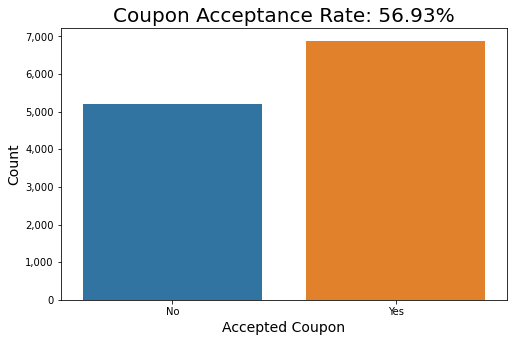

In [44]:
# Create the countplot
plt.figure(figsize=(8,5))
sns.countplot(x='accepted_coupon', data=df_clean)
plt.title('Coupon Acceptance Rate: 56.93%', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Accepted Coupon', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(["No", "Yes"])
plt.gca().yaxis.set_major_formatter(FuncFormatter(my.thousands))
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> Visually you can see that the majority said "Yes." 56.93% of the participants in the study chose to accept the coupon.
</div>

### Temperature

#### "Use a histogram to visualize the temperature column."

I'm using a Seaborn `sns.histplot()` to plot the distribution of temperatures. I've dimensioned it by "Accepted Coupon" to see if it offers any insight into how temperature affects acceptance rate. I'm also creating a `pd.crosstab()` of these variables, and plotting their normalized values using a Seaborn `sns.heatmap()`. Since these charts relate to each other, I'm plotting them side-by-side using the Matplotlib `plt.subplot()`.

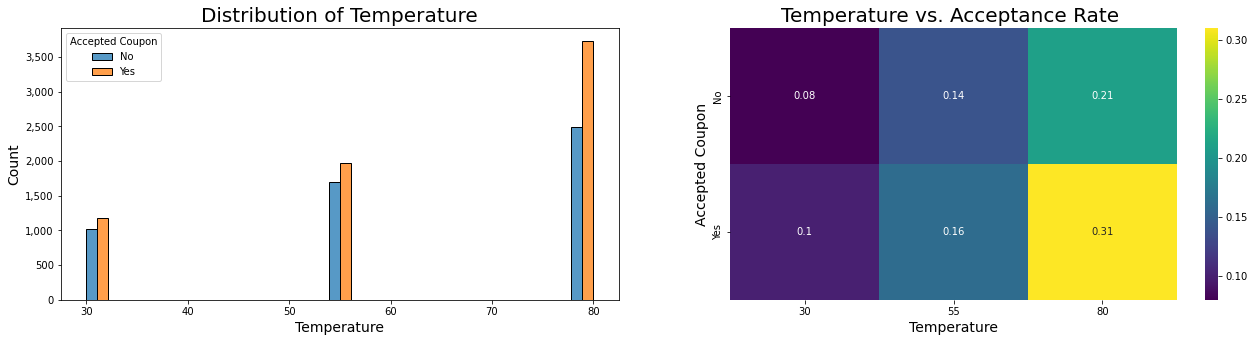

In [45]:
plt.figure(figsize=(22,5))

plt.subplot(121)
sns.histplot(x='temperature', multiple='dodge', data=df_clean, hue='accepted_coupon')
#sns.countplot(x='temperature', data=df_clean, hue='accepted_coupon') #Probably the better visualization
plt.title('Distribution of Temperature', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Temperature', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(my.thousands))
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')

# Create a contingency table or cross tabulation of this data
temp_crosstab = pd.crosstab(df_clean.accepted_coupon, df_clean.temperature, normalize = True)
temp_crosstab = round(temp_crosstab.rename(index = {0:'No', 1:'Yes'}), 2)

# Show the crosstab in a heatmap
plt.subplot(122)
sns.heatmap(temp_crosstab, cmap='viridis', annot=True)
plt.title('Temperature vs. Acceptance Rate ', fontsize=20)
plt.ylabel('Accepted Coupon', fontsize=14)
plt.xlabel('Temperature', fontsize=14)

plt.show()

In [46]:
# Check the unique values for temperature
df_clean['temperature'].unique()

array([55, 80, 30])

<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
    &#x1F446; <b>Note:</b> Temperature does not have a continuous numerical distribution. It is categorical or ordinal data for 3 temperature conditions. The request was to use a histogram, but would be better as a countplot or barchart. I've provided the countplot also, but it's commented out.
</div>

In [47]:
# Calculate percent of accepts (Yes vs No) in each temperature condition to double-check what we're seeing
df_temp_80 = df_clean.query("temperature == 80").groupby('accepted_coupon')['accepted_coupon'].count()
print(round(df_temp_80 / len(df_clean.query("temperature == 80")) * 100, 2))
#df_temp_55 = df_clean.query("temperature == 55").groupby('accepted_coupon')['accepted_coupon'].count()
#print(round(df_temp_55 / len(df_clean.query("temperature == 55")) * 100, 2))
#df_temp_30 = df_clean.query("temperature == 30").groupby('accepted_coupon')['accepted_coupon'].count()
#print(round(df_temp_30 / len(df_clean.query("temperature == 30")) * 100, 2))

accepted_coupon
0    40.04
1    59.96
Name: accepted_coupon, dtype: float64


<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> In the histogram, we can see that more coupons were accepted than denied in all temperature conditions. In the heatmap, it confirms that accepts ("Yes") at 80 degrees was the dominant condition (31%) among these groups. Both the "Yes" and "No" responses are increasing with each temperature condition. This could just be due to the scenario design, where they had more scenarios with temperatures of 80 degrees. But upon looking at the ratio of accepts within each temperature condition, we see that 59.96% were accepted in 80 degrees, which is larger than 53.71% in the other temperatures. So 80 degrees clearly increased acceptance.
</div>

## Bar Coupons

#### "Create a new DataFrame that contains just the bar coupons."


In [48]:
# Create a dataframe where the coupon was just for a bar, derive it from the cleaned dataset
df_bar = df_clean[df_clean['coupon']=='Bar']

In [49]:
# Verify we filtered down to the right set of data, and do a quick visual scan 
print("\nUnique values of 'coupon' in df_bar:", df_bar['coupon'].unique())
print(len(df_bar), "records in total\n")
#df_bar.head()


Unique values of 'coupon' in df_bar: ['Bar']
1913 records in total



### Bar Coupon Acceptance Rate

#### "What proportion of bar coupons were accepted?"



Proportion of Bar coupons that were accepted: 41.19%



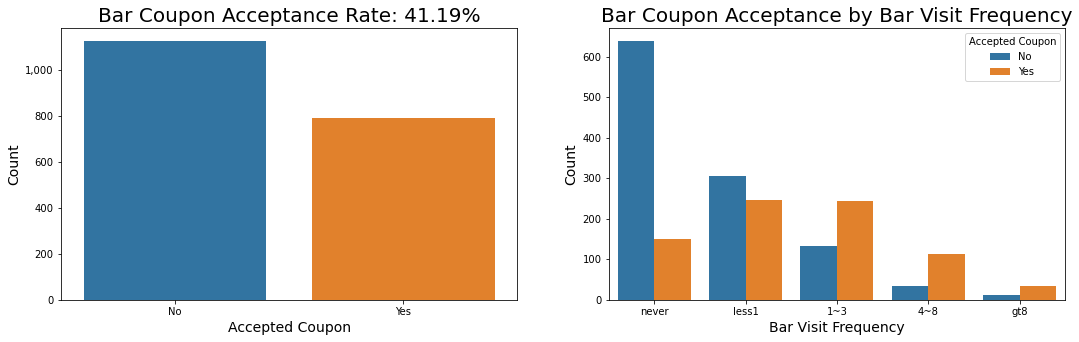

In [50]:
# Calculate percent that accepted vs. total "Bar" coupon records
percent_accepted = df_bar['accepted_coupon'].mean() * 100
print(f"\nProportion of Bar coupons that were accepted: {percent_accepted:.2f}%\n")

plt.figure(figsize=(18,5))

# Create a countplot showing this proportion
plt.subplot(121)
sns.countplot(x='accepted_coupon', data=df_bar)
plt.title('Bar Coupon Acceptance Rate: 41.19%', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Accepted Coupon', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(["No", "Yes"])
plt.gca().yaxis.set_major_formatter(FuncFormatter(my.thousands))

plt.subplot(122)
sns.countplot(x='bar', hue='accepted_coupon', data=df_bar, order=['never','less1','1~3','4~8','gt8'])
plt.title('Bar Coupon Acceptance by Bar Visit Frequency', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Bar Visit Frequency', fontsize=14)
plt.legend(title='Accepted Coupon', loc='upper right')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> 41.19% of the Bar coupons were accepted. This is less than the overall acceptance rate of 56.93%. Perhaps going to a bar is not as spontaneous a decision as the other types of coupons. From the chart on the right, we can see that most declines were from people that never went to a bar.
</div>

### Bar Coupon Acceptance Rate Comparisons

#### "Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more."

To achieve this, I will create 2 lists representing the target conditions. Then I will calculate the acceptance rates for each set of conditions. I'll popuate these results into a temporary dataframe, and then plot them on a chart for visual comparison. Because I was repeating the "rate calculations" over and over, I then went back and created a helper function `calculate_rate()` to reduce the repetitiveness of the code.

<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
    &#x1F446; <b>Note:</b> We need to decide if "never" and "less1" should be included in "3 or fewer" times a month. Since this statement says "those who went to a bar" and then specifies the rate, I'm going to exclude those who "never" went from this analysis. "less1" can be interpreted as "less than once a month," but since we're dealing with a frequency, it may not be 0. It could represent someone that goes to bars occasionally like once every 2 or 3 months, so I'm including that in this query.
</div>


Summary of Findings:

52.79% (492) of those that went to a bar 3 or fewer times a month (932) accepted the coupon. 47.21% (440) did not.

76.17% (147) of those that went to a bar 4 times or more a month (193) accepted the coupon. 23.83% (46) did not.



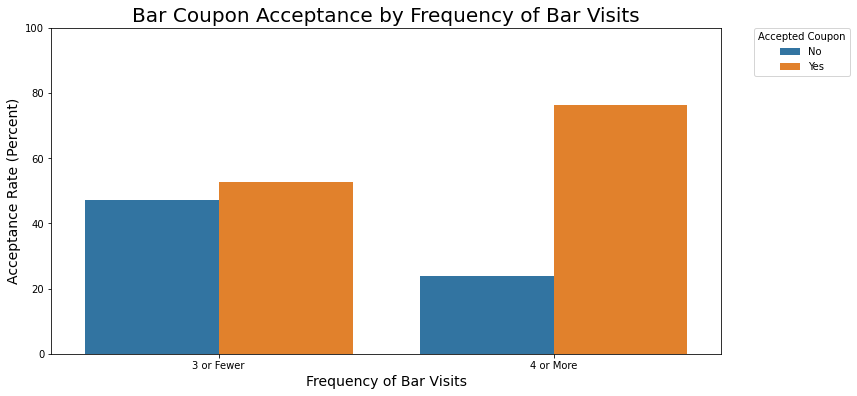

In [51]:
# 3a. List of bar visits "3 or fewer times a month"
#bar_visits_3_or_fewer = ['never','less1','1~3'] # Alternate if we include 'never'
bar_visits_3_or_fewer = ['less1','1~3']


# 3b. List of bar visits for "those who went more"
bar_visits_4_or_more = ['4~8','gt8']

# Define helper function to calculate acceptance rates, since we will be repeating this
def calculate_rate(df, condition_query, condition_text, rate_column, rate_text):
    no_count, yes_count = df.query(condition_query).groupby(rate_column)[rate_column].count()
    total = no_count + yes_count
    no_percent = no_count / total * 100
    yes_percent = yes_count / total * 100
    print(f"{yes_percent:.2f}% ({format(yes_count, ',')}) of {condition_text} ({format(total, ',')}) {rate_text}. {no_percent:.2f}% ({format(no_count, ',')}) did not.\n")
    return no_count, yes_count, no_percent, yes_percent

# Calculate acceptance rates, print out a summary, and populate the following variables
print("\nSummary of Findings:\n")
_3a_no, _3a_yes, _3a_no_percent, _3a_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_3_or_fewer', 'those that went to a bar 3 or fewer times a month', 'accepted_coupon', 'accepted the coupon')
_3b_no, _3b_yes, _3b_no_percent, _3b_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_4_or_more', 'those that went to a bar 4 times or more a month', 'accepted_coupon', 'accepted the coupon')

# Create a dataframe summarizing the rates so we can plot a chart
_3_results = {'Category': ['3 or Fewer', '3 or Fewer', '4 or More', '4 or More'],
              'Accepted': ['No', 'Yes', 'No', 'Yes'],
              'Count': [_3a_no, _3a_yes, _3b_no, _3b_yes],
              'Percent': [_3a_no_percent, _3a_yes_percent, _3b_no_percent, _3b_yes_percent]}
_3_df = pd.DataFrame(data=_3_results)

#print(_3_df) # for testing

# Plot a chart so we can visually compare the acceptance rates
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Percent', hue='Accepted', data=_3_df)
plt.title('Bar Coupon Acceptance by Frequency of Bar Visits', fontsize=20)
plt.ylabel('Acceptance Rate (Percent)', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Frequency of Bar Visits', fontsize=14)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.set_title('Accepted Coupon')
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> 76.17% of those who went to a bar 4 times a month or more accepted the coupon, vs. 52.79% for those that went 3 or fewer times a month. This suggests that the more people typically visit a bar, the greater chance that they will accept a bar coupon.
</div>

#### "Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all the others. Is there a difference?"


<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
    &#x1F446; <b>Note:</b> In this dataset, the closest matching survey option for "more than once a month" is listed as '1~3' which may mean "1 to 3 visits," which would include those who went just once a month. We also need to decide if "all the others" is the inverse of the first condition, or the total dataset. So if the first condition is ("visit 1 or more" and "age over 25"), the inverse would be ("no visits" and "age 25 or under"). The total would just be all the people that received bar coupons. Since I'm unsure of the request, I will calculate both.
</div>


Summary of Findings:

68.98% (278) of those that went to a bar 1 or more times a month and are over the age of 25 (403) accepted the coupon. 31.02% (125) did not.

38.83% (120) of those that went to a bar less than once a month and are 25 or younger (309) accepted the coupon. 61.17% (189) did not.

41.19% (788) of everyone that received a bar coupon (1,913) accepted the coupon. 58.81% (1,125) did not.



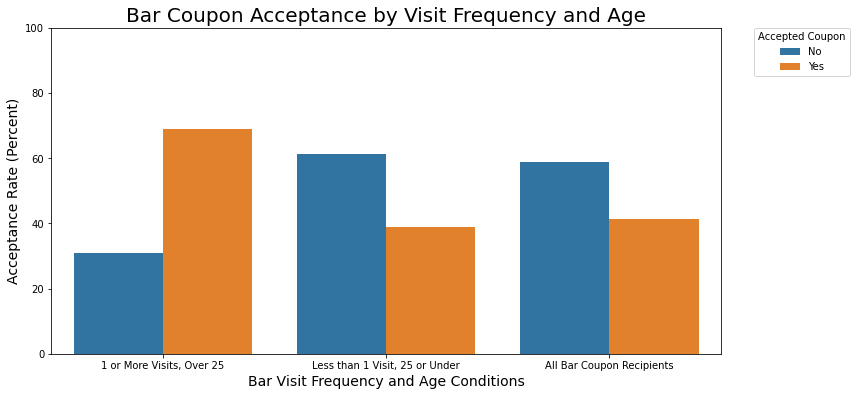

In [52]:
# 4a. List of bar visits for those who go "more than once a month" (Note: includes once a month)
bar_visits_1_or_more = ['1~3','4~8','gt8']

# 4a. List of ages for "over the age of 25"
age_over_25 = ['26','31','36','41','46','50plus']

# 4b. is the inverse of the above using "not in"

# 4c. is added to represent the total since I'm unclear on the meaning of "all the others" in the question

# Calculate acceptance rates, print out a summary, and populate the following variables
print("\nSummary of Findings:\n")
_4a_no, _4a_yes, _4a_no_percent, _4a_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_1_or_more and age in @age_over_25', 'those that went to a bar 1 or more times a month and are over the age of 25', 'accepted_coupon', 'accepted the coupon')
_4b_no, _4b_yes, _4b_no_percent, _4b_yes_percent = calculate_rate(df_bar, 'bar not in @bar_visits_1_or_more and age not in @age_over_25', 'those that went to a bar less than once a month and are 25 or younger', 'accepted_coupon', 'accepted the coupon')
_4c_no, _4c_yes, _4c_no_percent, _4c_yes_percent = calculate_rate(df_bar, 'index == index', 'everyone that received a bar coupon', 'accepted_coupon', 'accepted the coupon')

# Create a dataframe summarizing the rates so we can plot a chart
_4_results = {'Category': ['1 or More Visits, Over 25', '1 or More Visits, Over 25', 'Less than 1 Visit, 25 or Under', 'Less than 1 Visit, 25 or Under', 'All Bar Coupon Recipients', 'All Bar Coupon Recipients'],
              'Accepted': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
              'Count': [_4a_no, _4a_yes, _4b_no, _4b_yes, _4c_no, _4c_yes],
              'Percent': [_4a_no_percent, _4a_yes_percent, _4b_no_percent, _4b_yes_percent, _4c_no_percent, _4c_yes_percent]}
_4_df = pd.DataFrame(data=_4_results)

#print(_4_df) # for testing

# Plot a chart so we can visually compare the acceptance rates
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Percent', hue='Accepted', data=_4_df)
plt.title('Bar Coupon Acceptance by Visit Frequency and Age', fontsize=20)
plt.ylabel('Acceptance Rate (Percent)', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Bar Visit Frequency and Age Conditions', fontsize=14)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.set_title('Accepted Coupon')
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> 68.98% of those who went to a bar 1 or more times a month and were over the age of 25 accepted the coupon.   It was the highest acceptance rate compared to the other groups in this plot. However, it was not as high as the 76.17% acceptance rate for those that went 4 or more times a month.
</div>

#### "Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry."


<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
    &#x1F446; <b>Note:</b> This question is a little ambiguous on what should be compared with what. Since there are AND's between "drivers who go to bars more than once a month AND had passengers that were not a kid AND had occupations other than farming, fishing, or forestry" I will treat that as one very narrow query. Then the question is, what should it be compared to? As with the previous question, I will compare it with both the inverse and all recipients of bar coupons. Ideally, this is a clarification I would be able to resolve in Q&A with the customer.
</div>


Summary of Findings:

71.43% (135) of those that went to a bar 1 or more times a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry (189) accepted the coupon. 28.57% (54) did not.

50.00% (4) of those that went to a bar less than 1 time a month, had passengers that were a kid, and had an occupation in farming, fishing, or forestry (8) accepted the coupon. 50.00% (4) did not.

41.19% (788) of everyone that received a bar coupon (1,913) accepted the coupon. 58.81% (1,125) did not.



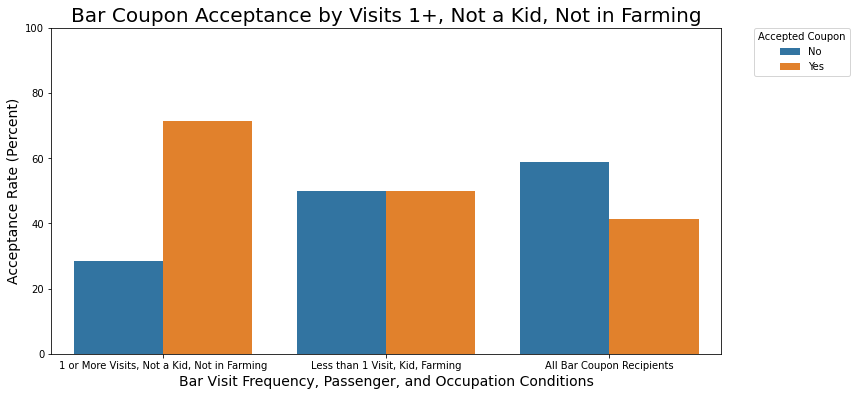

In [53]:
# 5a. List of bar visits for those who go "more than once a month" (Note: includes once a month)
bar_visits_1_or_more = ['1~3','4~8','gt8']

# 5b. List of passengers that were "not a kid"
passenger_not_a_kid = ['Friend(s)','Partner']

# 5c. Will just be the inverse of 'Farming Fishing & Forestry'
occupation_farming = ['Farming Fishing & Forestry']

# Calculate acceptance rates, print out a summary, and populate the following variables
print("\nSummary of Findings:\n")
_5a_no, _5a_yes, _5a_no_percent, _5a_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_1_or_more and passenger in @passenger_not_a_kid and occupation not in @occupation_farming', 'those that went to a bar 1 or more times a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry', 'accepted_coupon', 'accepted the coupon')
_5b_no, _5b_yes, _5b_no_percent, _5b_yes_percent = calculate_rate(df_bar, 'bar not in @bar_visits_1_or_more and passenger not in @passenger_not_a_kid and occupation in @occupation_farming', 'those that went to a bar less than 1 time a month, had passengers that were a kid, and had an occupation in farming, fishing, or forestry', 'accepted_coupon', 'accepted the coupon')
_5c_no, _5c_yes, _5c_no_percent, _5c_yes_percent = calculate_rate(df_bar, 'index == index', 'everyone that received a bar coupon', 'accepted_coupon', 'accepted the coupon')

# Note: The above queries but with "and occupation not in @occupation_farming" removed produce the same results, uncomment to verify
#_5a_no, _5a_yes, _5a_no_percent, _5a_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_1_or_more and passenger in @passenger_not_a_kid', 'those that went to a bar 1 or more times a month, and had passengers that were not a kid', 'accepted_coupon', 'accepted the coupon')
#_5b_no, _5b_yes, _5b_no_percent, _5b_yes_percent = calculate_rate(df_bar, 'bar not in @bar_visits_1_or_more and passenger not in @passenger_not_a_kid', 'those that went to a bar less than 1 time a month, and had passengers that were a kid', 'accepted_coupon', 'accepted the coupon')

# Create a dataframe summarizing the rates so we can plot a chart
_5_results = {'Category': ['1 or More Visits, Not a Kid, Not in Farming', '1 or More Visits, Not a Kid, Not in Farming', 'Less than 1 Visit, Kid, Farming', 'Less than 1 Visit, Kid, Farming', 'All Bar Coupon Recipients', 'All Bar Coupon Recipients'],
              'Accepted': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
              'Count': [_5a_no, _5a_yes, _5b_no, _5b_yes, _5c_no, _5c_yes],
              'Percent': [_5a_no_percent, _5a_yes_percent, _5b_no_percent, _5b_yes_percent, _5c_no_percent, _5c_yes_percent]}
_5_df = pd.DataFrame(data=_5_results)

#print(_5_df) # for testing

# Plot a chart so we can visually compare the acceptance rates
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Percent', hue='Accepted', data=_5_df)
plt.title('Bar Coupon Acceptance by Visits 1+, Not a Kid, Not in Farming', fontsize=20)
plt.ylabel('Acceptance Rate (Percent)', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Bar Visit Frequency, Passenger, and Occupation Conditions', fontsize=14)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.set_title('Accepted Coupon')
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> 71.43% of those that went to a bar 1 or more times a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry accepted the coupon.   It was the highest acceptance rate compared to the other groups in this plot. However, it was not as high as the 76.17% acceptance rate for those that went 4 or more times a month.
</div>

<div style="background-color: #fcfadc; border: 1px solid #ffd700; padding: 10px; border-radius: 3px;">
    &#x1F446; <b>Note:</b> The inclusion of "occupations other than farming, fishing, or forestry" in this query did not make a difference. It produced the same results as when this is excluded. You can see this query commented out above. However, I kept it since this was the requested criteria.
</div>

#### "Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K."




Summary of Findings:

71.43% (135) of those that went to a bar 1 or more times a month, had passengers that were not a kid, and were not widowed (189) accepted the coupon. 28.57% (54) did not.

71.95% (236) of those that went to a bar 1 or more times a month, and were under the age of 30 (328) accepted the coupon. 28.05% (92) did not.

45.65% (152) of those that go to cheap restaurants more than 4 times a month, and income less than 50k (333) accepted the coupon. 54.35% (181) did not.



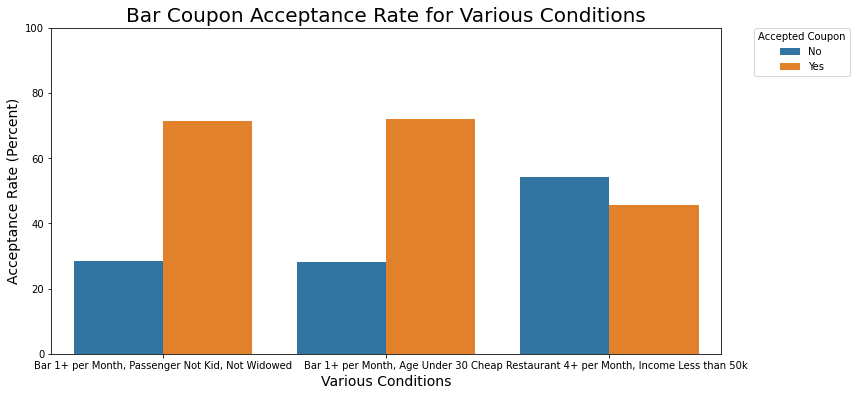

In [54]:
# 6a. & 6b. List of bar visits for those who go "more than once a month" (Note: includes once a month)
bar_visits_1_or_more = ['1~3','4~8','gt8']

# 6a. List of passengers that were "not a kid"
passenger_not_a_kid = ['Friend(s)','Partner']

# 6a. List of marital status for "not widowed"
marital_widowed = ['Widowed'] # Inverse of this (not in)

# 6b. List of ages for "under the age of 30"
age_under_30 = ['below21','21','26']

# 6c. List of "cheap" restaurant (restaurant_less_than_20) values representing "more than 4 times a month"
cheap_rest_4_times_or_more = ['4~8', 'gt8']

# 6c. List of income values representing "less than 50k"
income_less_than_50k = ['$37500 - $49999',
                        '$25000 - $37499',
                        '$12500 - $24999',
                        'Less than $12500']

_6a_category = 'Bar 1+ per Month, Passenger Not Kid, Not Widowed'
_6b_category = 'Bar 1+ per Month, Age Under 30'
_6c_category = 'Cheap Restaurant 4+ per Month, Income Less than 50k'

# Calculate acceptance rates, print out a summary, and populate the following variables
print("\nSummary of Findings:\n")
_6a_no, _6a_yes, _6a_no_percent, _6a_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_1_or_more and passenger in @passenger_not_a_kid and marital_status not in @marital_widowed', 'those that went to a bar 1 or more times a month, had passengers that were not a kid, and were not widowed', 'accepted_coupon', 'accepted the coupon')
_6b_no, _6b_yes, _6b_no_percent, _6b_yes_percent = calculate_rate(df_bar, 'bar in @bar_visits_1_or_more and age in @age_under_30', 'those that went to a bar 1 or more times a month, and were under the age of 30', 'accepted_coupon', 'accepted the coupon')
_6c_no, _6c_yes, _6c_no_percent, _6c_yes_percent = calculate_rate(df_bar, 'restaurant_less_than_20 in @cheap_rest_4_times_or_more and income in @income_less_than_50k', 'those that go to cheap restaurants more than 4 times a month, and income less than 50k', 'accepted_coupon', 'accepted the coupon')

# Create a dataframe summarizing the rates so we can plot a chart
_6_results = {'Category': [_6a_category, _6a_category, _6b_category, _6b_category, _6c_category, _6c_category],
              'Accepted': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
              'Count': [_6a_no, _6a_yes, _6b_no, _6b_yes, _6c_no, _6c_yes],
              'Percent': [_6a_no_percent, _6a_yes_percent, _6b_no_percent, _6b_yes_percent, _6c_no_percent, _6c_yes_percent]}
_6_df = pd.DataFrame(data=_6_results)

#print(_6_df) # for testing

# Plot a chart so we can visually compare the acceptance rates
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Percent', hue='Accepted', data=_6_df)
plt.title('Bar Coupon Acceptance Rate for Various Conditions', fontsize=20)
plt.ylabel('Acceptance Rate (Percent)', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Various Conditions', fontsize=14)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.set_title('Accepted Coupon')
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> Of these 3 conditions, the first 2 had about the same acceptance rate around 71%. Those that went to a bar 1 or more times a month, had pasesengers that were not a kid, and were not widowed, accepted the coupon 71.43% of the time. Those that went to a bar 1 or more times a month, and were under the age of 30, accepted the coupon 71.95% of the time. It could be those conditions are targeting the same population. However, the third condition is significantly different. Those that went to cheap restaurants more than 4 times a month and had income less than 50k accepted the coupon only 45.65% of the time. 
</div>

### Bar Coupon Acceptance Rate by Age

The age inferences from the previous queries seemed to be giving an indirect view of the relationship of bar coupon acceptance and age – just two "slices" of the data from the specified queries. So I thought I would create a final chart that was dedicated to showing acceptance rate compared with all ages.

In [55]:
# Get the ages of people who got bar coupons and either accepted or declined them
bar_yes_ages = df_enc.query("coupon == 'Bar' and accepted_coupon == 1")['age_enc']
bar_no_ages = df_enc.query("coupon == 'Bar' and accepted_coupon == 0")['age_enc']

# Calculate their means and standard deviations
bar_yes_ages_mean = round(bar_yes_ages.mean(), 2)
bar_no_ages_mean = round(bar_no_ages.mean(), 2)
bar_yes_ages_std = round(bar_yes_ages.std(), 2)
bar_no_ages_std = round(bar_no_ages.std(), 2)

print("\nMean Age (encoded) of those who accepted coupons (Yes): ", bar_yes_ages_mean, " Standard deviation:", bar_yes_ages_std)
print("Mean Age (encoded) of those who declined coupons (No): ", bar_no_ages_mean, " Standard deviation:", bar_no_ages_std, "\n")



Mean Age (encoded) of those who accepted coupons (Yes):  30.75  Standard deviation: 9.87
Mean Age (encoded) of those who declined coupons (No):  33.45  Standard deviation: 10.46 



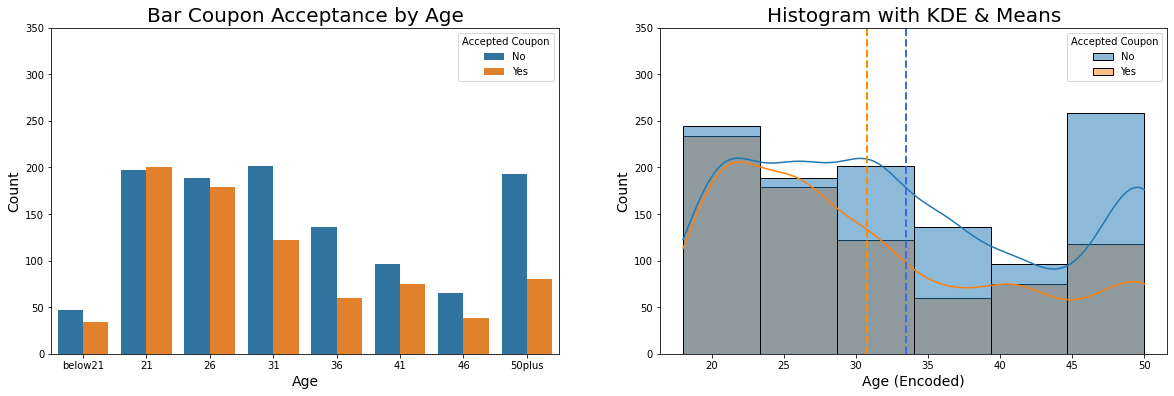

In [56]:
plt.figure(figsize=(20,6))

# Create a countplot showing coupon acceptance by age categories
plt.subplot(121)
sns.countplot(x='age', hue='accepted_coupon', data=df_bar, order=['below21','21','26','31','36','41','46','50plus'])
plt.title('Bar Coupon Acceptance by Age', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylim(0,350)
plt.legend(title='Accepted Coupon', loc='upper right')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

# Create a histogram of encoded age data and plot KDE curves and mean lines
plt.subplot(122)
sns.histplot(x='age_enc', hue='accepted_coupon', bins=6, multiple='layer', kde=True, data=df_enc[df_enc['coupon']=='Bar'])
plt.title('Histogram with KDE & Means', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age (Encoded)', fontsize=14)
plt.ylim(0,350)
legend = plt.gca().get_legend()
legend.set_title('Accepted Coupon')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
# Plot the means of both the Yes and No subsets as separate vertical lines
plt.axvline(x = bar_yes_ages_mean, color = 'darkorange', linestyle='--', linewidth=2)
plt.axvline(x = bar_no_ages_mean, color = 'royalblue', linestyle='--', linewidth=2)

plt.show()

### Bar Coupon Conclusions

#### "Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?"

Here's what we've learned from our investigation of Bar Coupons:

* **Most bar coupons were accepted by frequent bar visitors** – 76.17% of those who went to a bar 4 times a month or more accepted the coupon, vs. 52.79% for those that went 3 or fewer times a month. This suggests that the more people typically visit a bar, the greater chance that they will accept a bar coupon.
* **Most had passengers that were not a child** – 71.43% of those that went to a bar 1 or more times a month, had passengers that were not a kid. 
* **Most were between the ages of 25-30** – Now we have a few data points to support this:
    * 68.98% of those who went to a bar 1 or more times a month, and were over the age of 25, accepted the coupon.
    * 71.95% of those who went to a bar 1 or more times a month, and were under the age of 30, accepted the coupon.
    * From the additional plots, we can see:
        * Based on the encoded Age data, the **mean age is 30.75** for those that accepted
        * The mean age for those that declined was 33.45
    * Obviously you have to be 21 or older to even go into a bar, which sets the lower bound.
    * The upper boundary could perhaps reflect the change in lifestyle as people settle down and have families
    * There is a significant change in behavior once you are over 50. We'd have to interview them to understand the driver, but perhaps its related to health concerns or lifestyle changes

## Coffee Coupons

The next dataset I looked at are the coupons for Coffee Houses. I started by creating a subset of the data in a new dataframe called `df_coffee` as before.

In [57]:
# Create a dataframe where the coupon was just for a Coffee House, derive it from the cleaned dataset
df_coffee = df_clean[df_clean['coupon']=='Coffee House']

In [58]:
# Verify we filtered down to the right set of data, and do a quick visual scan 
print("\nUnique values of 'coupon' in df_coffee:", df_coffee['coupon'].unique())
print(len(df_coffee), "records in total\n")
#df_coffee.head()


Unique values of 'coupon' in df_coffee: ['Coffee House']
3816 records in total



### Coffee Coupon Acceptance Rate

Let's start by taking a look at the overall acceptrance rate, as we did for the Bar coupons.


Proportion of Coffee coupons that were accepted: 49.63%



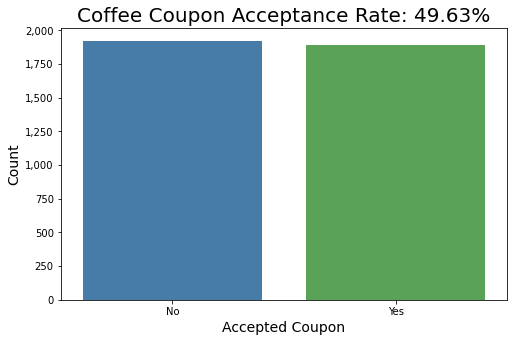

In [59]:
# Create a custom color palette to differentiate these charts
#temp_palette = sns.color_palette('Set1')
#print(temp_palette.as_hex())
coffee_colors = ["#377eb8", '#4daf4a', "#e41a1c", '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']
coffee_palette = sns.color_palette(coffee_colors)

# Calculate percent that accepted vs. total "Coffee House" coupon records
coffee_percent_accepted = df_coffee['accepted_coupon'].mean() * 100
print(f"\nProportion of Coffee coupons that were accepted: {coffee_percent_accepted:.2f}%\n")

# Create a countplot showing this proportion
plt.figure(figsize=(8,5))
sns.countplot(x='accepted_coupon', data=df_coffee, palette=coffee_palette)
plt.title('Coffee Coupon Acceptance Rate: 49.63%', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Accepted Coupon', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(["No", "Yes"])
plt.gca().yaxis.set_major_formatter(FuncFormatter(my.thousands))
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> 49.63% of the Coffee coupons were accepted, pretty much an even split, as you can visually see. This is less than the overall acceptance rate of 56.93%, but higher that what we saw for Bars (41.19%). Looks like buying a coffee might be more of a spontaneous purchase than going to a bar.
</div>

### Coffee Coupon Correlations

To see if there are other interesting variables to explore, let's create a correlation matrix on just this subset of data for Coffee coupons. We'll draw a subset of our data from the larger `df_onehot` dataframe that we encoded previously. 

In [60]:
# Create a subset of the one-hot dataframe for Coffee House coupons, drop NaN columns
df_onehot_coffee = df_onehot[df_onehot['coup_Coffee House']==1]
df_onehot_coffee = df_onehot_coffee.drop(columns=['coup_Coffee House','coup_Bar','coup_Carry out & Take away','coup_Restaurant(20-50)','coup_Restaurant(<20)'])
# Create the correlation, rounding decimels to 2
corr_cof_onehot = round(df_onehot_coffee.corr(numeric_only=True), 2)

# NOTE: Not shown due to size, but uncomment to review
# Plot the correlation using sns.heatmap
#plt.figure(figsize=(60, 40))
#sns.heatmap(corr_cof_onehot, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
#plt.show()

In [61]:
# Show the correlations just for "accepted_coupon" so we can see the extreme positives and negative
#corr_cof_onehot[['accepted_coupon']].sort_values(by='accepted_coupon', ascending=False)[:10]
#corr_cof_onehot[['accepted_coupon']].sort_values(by='accepted_coupon', ascending=True)[:10]

In [62]:
# Get the ages of people who got coffee coupons and either accepted or declined them
cof_yes_ages = df_enc.query("coupon == 'Coffee House' and accepted_coupon == 1")['age_enc']
cof_no_ages = df_enc.query("coupon == 'Coffee House' and accepted_coupon == 0")['age_enc']

# Calculate their means and standard deviations
cof_yes_ages_mean = round(cof_yes_ages.mean(), 2)
cof_no_ages_mean = round(cof_no_ages.mean(), 2)
cof_yes_ages_std = round(cof_yes_ages.std(), 2)
cof_no_ages_std = round(cof_no_ages.std(), 2)

print("\nMean Age (encoded) of those who accepted coupons (Yes): ", cof_yes_ages_mean, " Standard deviation:", cof_yes_ages_std)
print("Mean Age (encoded) of those who declined coupons (No): ", cof_no_ages_mean, " Standard deviation:", cof_no_ages_std, "\n")



Mean Age (encoded) of those who accepted coupons (Yes):  31.34  Standard deviation: 10.15
Mean Age (encoded) of those who declined coupons (No):  32.8  Standard deviation: 10.41 



In [63]:
# Create a dataframe that just has the columns we now know are correlated with "accepted_coupon" (just the top ones)
df_accepted_coffee = df_onehot_coffee[['accepted_coupon','coffee_house_enc','dest_No Urgent Place','expiration_enc',
                                'pass_Friend(s)','occu_Student','distance','pass_Alone','dest_Home']]

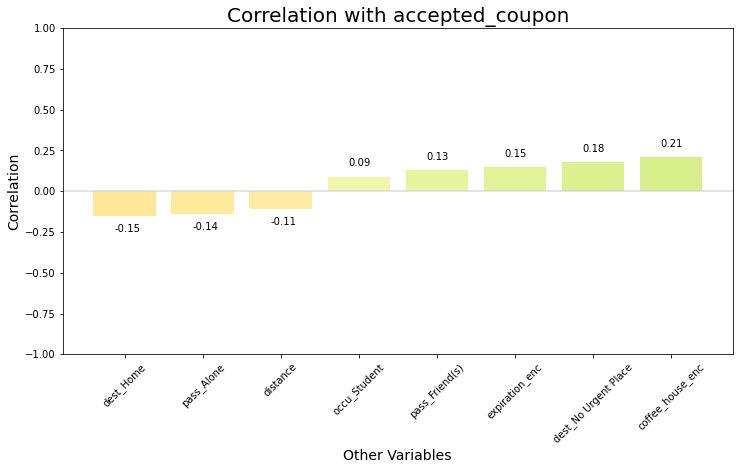

In [64]:
# Use a custom function to plot a chart showing the correlations with "accepted_coupon" (just the top ones)
my.plot_corr(df_accepted_coffee, 'accepted_coupon', size=(12,6))

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> Here's what we can infer from these correlations with Accepted Coupon from just within the Coffee House coupon subset of data:
    <ul>
        <li><b>Frequency of Visits to Coffee Houses</b> had a weak positive correlation at <b>0.21</b>, suggesting people were more likely to accept a coffee coupon the more frequently they visit a coffee shop.
        <li><b>No Urgent Place</b> destination had a weak positive correlation at <b>0.18</b>, contrasting with <b>Home</b>, which had a weak negative correlation at <b>-0.15</b>. This suggests people were more likely to accept a coffee coupon when they had no urgent destination to reach, and less likely to accept when they were heading home (perhaps because it's the end of an excursion).
        <li><b>Student</b> as an occupation had a weak positive correlation at <b>0.09</b>, which suggests students may be more likely to accept a coupon for coffee. Perhaps they also frequent coffee houses more? This is something we can examine further next.
        <li>The rest of these correlations were seen in the analysis of correlations for the entire dataset, so I won't repeat the insights here.
    </ul>
</div>

### Coffee Coupon Acceptance Rate vs. Visit Frequency

#### "Compare the acceptance rate between those who went to a coffee shop 1 or more times a month, to those who went less."¶

We saw that frequency of visits to a coffee house was positively correlated with acceptance rate (0.21). Let's take a closer look at this relationship. We'll compare those who visit a coffee shop more frequently vs. less frequently.


Summary of Findings:

65.90% (1,231) of those that went to a coffee shop 1 or more times a month (1,868) accepted the coupon. 34.10% (637) did not.

48.10% (506) of those that went to a coffee shop less than 1 time a month (1,052) accepted the coupon. 51.90% (546) did not.



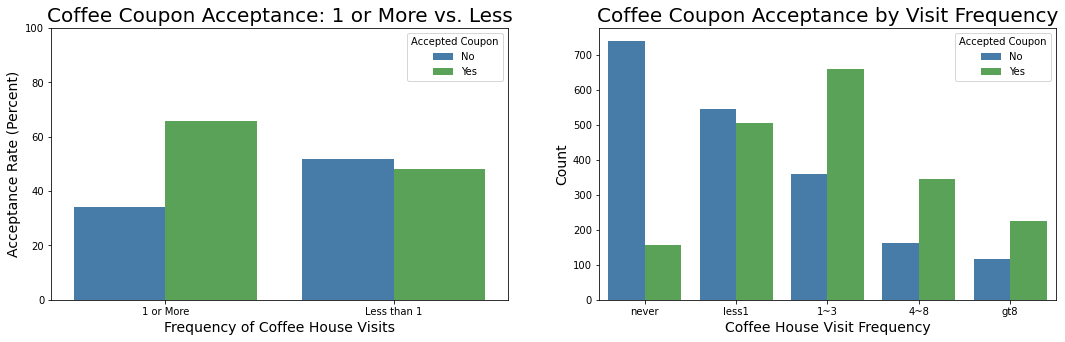

In [65]:
# 7a. List of coffee visits "1 or more times a month"
cof_visits_1_or_more = ['1~3','4~8','gt8']

# 7b. List of coffee visits for "those who went less"
#cof_visits_less_than_1 = ['never','less1'] # Alternate if we include 'never'
cof_visits_less_than_1 = ['less1']

# Calculate acceptance rates, print out a summary, and populate the following variables
print("\nSummary of Findings:\n")
_7a_no, _7a_yes, _7a_no_percent, _7a_yes_percent = calculate_rate(df_coffee, 'coffee_house in @cof_visits_1_or_more', 'those that went to a coffee shop 1 or more times a month', 'accepted_coupon', 'accepted the coupon')
_7b_no, _7b_yes, _7b_no_percent, _7b_yes_percent = calculate_rate(df_coffee, 'coffee_house in @cof_visits_less_than_1', 'those that went to a coffee shop less than 1 time a month', 'accepted_coupon', 'accepted the coupon')

# Create a dataframe summarizing the rates so we can plot a chart
_7_results = {'Category': ['1 or More', '1 or More', 'Less than 1', 'Less than 1'],
              'Accepted': ['No', 'Yes', 'No', 'Yes'],
              'Count': [_7a_no, _7a_yes, _7b_no, _7b_yes],
              'Percent': [_7a_no_percent, _7a_yes_percent, _7b_no_percent, _7b_yes_percent]}
_7_df = pd.DataFrame(data=_7_results)

#print(_7_df) # for testing

# Plot a figure to showcase the results, a 2-chart layout using subplots
plt.figure(figsize=(18,5))

# Plot a barplot so we can visually compare the acceptance rates
plt.subplot(121)
sns.barplot(x='Category', y='Percent', hue='Accepted', data=_7_df, palette=coffee_palette)
plt.title('Coffee Coupon Acceptance: 1 or More vs. Less', fontsize=20)
plt.ylabel('Acceptance Rate (Percent)', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Frequency of Coffee House Visits', fontsize=14)
plt.legend(title='Accepted Coupon', loc='upper right')

# Plot a countplot so we can see acceptance rate by frequency of visit
plt.subplot(122)
sns.countplot(x='coffee_house', hue='accepted_coupon', data=df_coffee, order=['never','less1','1~3','4~8','gt8'], palette=coffee_palette)
plt.title('Coffee Coupon Acceptance by Visit Frequency', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Coffee House Visit Frequency', fontsize=14)
plt.legend(title='Accepted Coupon', loc='upper right')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> 65.90% of those who went to a coffee shop 1 or more times a month accepted the coupon, vs. 48.10% that went less (not including those that went never). This suggests that the more people typically visit a coffee shop, the greater chance that they will accept a coffee coupon. If you look at the chart on the right, you can see an even more significant effect on the 'never' frequency – that had the largest amount of declines.
</div>

### Coffee Coupon Acceptance Rate vs. Destination

#### "Compare the acceptance rate between various driving destinations."¶

We saw that the driving destination "No Urgent Place" was positively correlated with coupon acceptance (0.18). Let's take a closer look at this relationship. We'll create a countplot showing accepts and declines for the 3 destinations, and compute a contingency table and plot the normalized values in a heatmap.

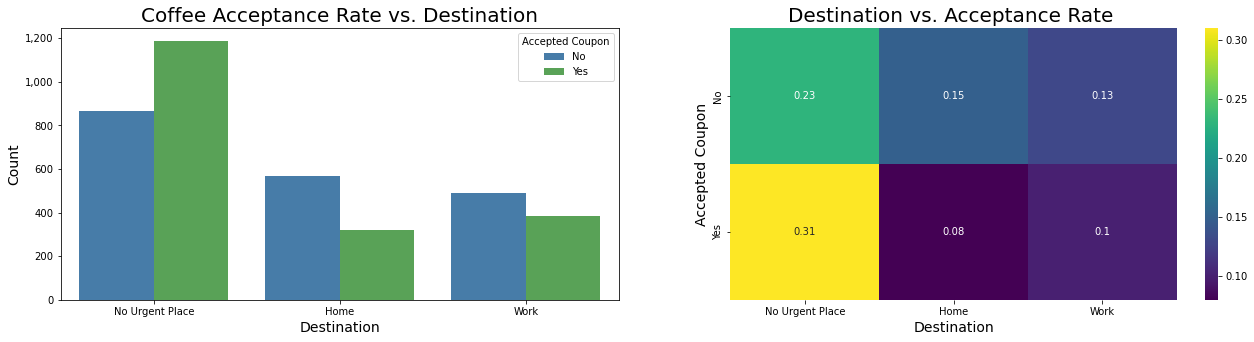

In [66]:
plt.figure(figsize=(22,5))

# Create a countplot comparing the acceptance rate with destination
plt.subplot(121)
sns.countplot(x='destination', data=df_coffee, hue='accepted_coupon', palette=coffee_palette) 
plt.title('Coffee Acceptance Rate vs. Destination', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Destination', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(my.thousands))
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')

# Create a contingency table or cross tabulation of this data
dest_crosstab = pd.crosstab(df_coffee.accepted_coupon, df_coffee.destination, normalize = True)
dest_crosstab = round(dest_crosstab.rename(index = {0:'No', 1:'Yes'}), 2)
dest_order = ['No Urgent Place', 'Home', 'Work']
dest_crosstab = dest_crosstab[dest_order]

# Show the crosstab in a heatmap
plt.subplot(122)
sns.heatmap(dest_crosstab, cmap='viridis', annot=True)
plt.title('Destination vs. Acceptance Rate ', fontsize=20)
plt.ylabel('Accepted Coupon', fontsize=14)
plt.xlabel('Destination', fontsize=14)

plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> In the countplot, we can see that there were more accepts than declines in one condition only: "No Urgent Place". This seems significant, and aligns with the correlation we saw (0.18) In the heatmap, we can see Accepts ("Yes") in "No Urgent Place" was the most popular condition in the crosstab (normalized here).
</div>

### Coffee Coupon Acceptance Rate vs. Occupation

#### "Compare the coffee coupon acceptance rate between various occupations."¶

We saw that the occupation "Student" was positively correlated with coupon acceptance (0.09). Let's take a closer look at this relationship between acceptance rate and occupations in general. We'll create a countplot showing accepts and declines for all the occupations listed in this dataset.

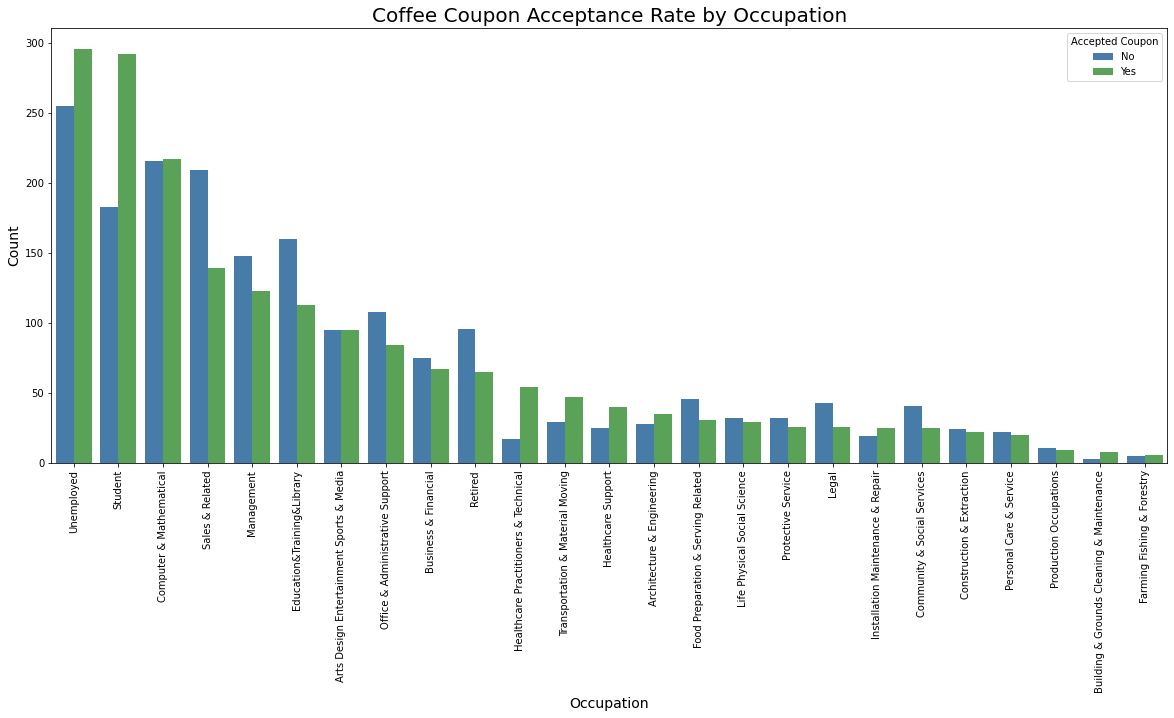

In [67]:
# Compute the count for each occupation where accepted_coupon equals to 1
occupation_count = df_coffee[df_coffee['accepted_coupon'] == 1]['occupation'].value_counts()

# Get the occupations in descending order of count
occupation_order = occupation_count.index

# Plot the countplot with the order specified
plt.figure(figsize=(20,8))
sns.countplot(data=df_coffee, hue='accepted_coupon', x='occupation', order=occupation_order, palette=coffee_palette)
plt.title('Coffee Coupon Acceptance Rate by Occupation', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=90)
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
legend.set_title('Accepted Coupon')
plt.show()

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> The bars in this countplot are sorted in descending order by those that said "Yes" to accept a coffee coupon. We can see that "Unemployed" had the largest amount of people accepting coupons, but also the largest amount of declines. It may have just been the largest category in general. But the next one is "Student," and we can see there are substantially more accepts than declines here. This supports the positive correlation we saw with this category earlier.
</div>

### Coffee Coupon Acceptance Rate vs. Age and Gender

#### "Compare the coffee coupon acceptance rate between various occupations."¶

Finally, let's see if other demographic variables like gender or age had an effect on coffee coupon acceptance. We'll do a simple countplot and boxplot.

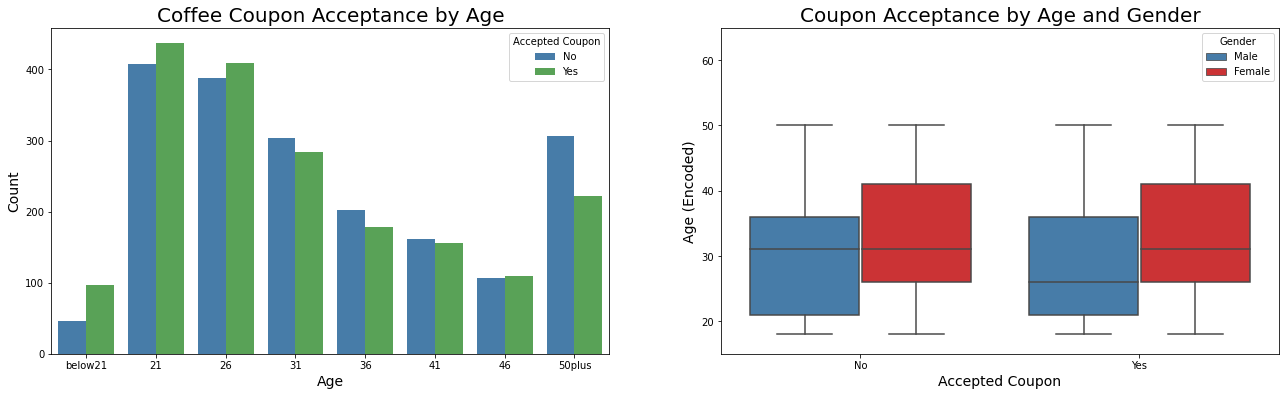

In [68]:
plt.figure(figsize=(22,6))

# Create a countplot showing coupon acceptance by age categories
plt.subplot(121)
sns.countplot(x='age', hue='accepted_coupon', data=df_coffee, order=['below21','21','26','31','36','41','46','50plus'], palette=coffee_palette)
plt.title('Coffee Coupon Acceptance by Age', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
#plt.ylim(0,350)
plt.legend(title='Accepted Coupon', loc='upper right')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')

# Create a custom color palette to differentiate gender
gender_colors = ['#377eb8', '#e41a1c', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']
gender_palette = sns.color_palette(gender_colors)


# Create a boxplot of encoded age data and coupon acceptance
plt.subplot(122)
sns.boxplot(y='age_enc', x='accepted_coupon', hue='gender_enc', data=df_enc[df_enc['coupon']=='Coffee House'], palette=gender_palette)
plt.title('Coupon Acceptance by Age and Gender', fontsize=20)
plt.ylabel('Age (Encoded)', fontsize=14)
plt.xlabel('Accepted Coupon', fontsize=14)
plt.ylim(15,65)
plt.legend(title='Gender', loc='upper right')
legend = plt.gca().get_legend()
legend.get_texts()[0].set_text('Male')
legend.get_texts()[1].set_text('Female')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [69]:
# Calculate the median age for males and females that accepted the coffee coupons
df_enc.query("coupon == 'Coffee House' and accepted_coupon == 1").groupby('gender_enc').median(numeric_only=True)['age_enc']

gender_enc
0    26.0
1    31.0
Name: age_enc, dtype: float64

<div style="background-color: #def5dc; border: 1px solid #89c787; padding: 10px; border-radius: 3px;">
    &#x1f4a1; <b>Insight:</b> In the countplot, we can see roughly an equal ratio of accepts vs. declines in most age brackets. The exception is "50 plus", which has more declines, and "below 21", which has more accepts. In the boxplot, we see females that accepted the coupons had an older age range. However, the median is the same for all of these groupings except for "Males" that Accepted the coffee coupon (26 years). The rest have a median of 31 years. This is partly a limitation of the data, but it suggests that males that accepted the coupon tended to be younger. 
</div>

### Coffee Coupon Conclusions

Here's what we've learned from our investigation of Coffee Coupons:

* **Coffee coupon accepts/declines were evenly split** - 49.63% of the Coffee coupons were accepted. This is less than the overall acceptance rate of 56.93%, but higher that what we saw for Bars (41.19%). Looks like buying a coffee might be more of a spontaneous purchase than going to a bar.
* **Frequency of Visits, No Urgent Place, and Student had positive correlations** with acceptance of coffee coupons.
    * **Frequency of visits to Coffee Houses** had a weak positive correlation at 0.21, suggesting people were more likely to accept a coffee coupon the more frequently they visit a coffee shop. 65.90% of those who went to a coffee shop 1 or more times a month accepted the coupon, vs. 48.10% that went less (not including those that went never). 
    * **No Urgent Place destination** had a weak positive correlation at 0.18, contrasting with Home, which had a weak negative correlation at -0.15. This suggests people were more likely to accept a coffee coupon when they had no urgent destination to reach, and less likely to accept when they were heading home (perhaps because it's the end of an excursion). There were more accepts than declines in one condition only: "No Urgent Place".
    * **Student as an occupation** had a weak positive correlation at 0.09, which suggests students may be more likely to accept a coupon for coffee. "Student" was the second largest occupation when ranked by number of accepts, and there were substantially more accepts than declines compared to the other occupations.
* **Younger people accepted coffee coupons more than older people**. There was roughly an equal ratio of accepts vs. declines in most age brackets. The exception was "50 plus", which has more declines, and "below 21", which had more accepts.
* **Males that accepted coffee coupons were younger than females that accepted**. "Males" that Accepted the coffee coupon had a median age of 26 years. The rest had a median age of 31 years.

# Summary of Findings

## Participant Demographics

Here's what we learned about the participants of this survey:

* Most participants were **Employed** (68.67%)
* A number of them were Unemployed (15.02%) or Students (12.39%) or Retired (3.92%)
* **Computer & Mathematical** was the top occupation (11.33%) for those employed
* Most had **Some College** (34.93%) or a **Bachelor's degree** (33.29%)
* Most had an income in the range of **\$25,000 - \\$37,499** (15.87%)
* Most were in the between the **Ages of 21-30** (41%)
* There's about an even split between Married (40%) and Single (37.98%)
* It was also an even split between Males (48.68%) and Females (51.32%)
* Most had **no children** (59.15%)
* Most never went to bars (40.97%)
* Most went to cheap restaurants 1-3 times a month (42.38%)
* Most went to \$20-\\$50 restaurants less than once a month (47.91%)

## General Correlations

We saw the following correlations between variables in this study:

* The strongest positive correlation is between **Age and Has Children**, it's moderate at 0.44. This is not suprising, the older you are, the more likely you are to have children.
* The strongest negative correlation is between **Distance and Direction**, it's moderate at -0.32. This is between 2 scenario variables, and not a participant's response to a scenario variable, so not very meaningful (I'll exclude any other correlations between survey scenario variables)
* **Income and Education Years** had a moderate positive correlation at 0.3
* **Age and Employed** had a weak positive correlation at 0.21
* **Age and Education Years** had a weak positive correlation at 0.18
* **Bar and Has Children** had a weak negative correlation at -0.17, suggesting people with children frequent bars less
* **Bar and Age** had a weak negative correlation at -0.15, suggesting younger people frequent bars more often

## Coupon Acceptance

Here's what we learned about Accepted Coupon (Yes or No) our main variable of interest:

* **Most said "Yes"** - The majority (56.93%) of the participants in the study chose to accept the coupon.
* **Heat made a Difference** – When it was 80 degrees, 59.96% of coupons were accepted, which is larger than 53.71% in the other temperature conditions

We also saw the following correlations, which could be clues to variables with predictive power:

* **Carry Out Coupons** had a weak positive correlation at 0.16, suggesting people were more likely to accept a coupon for take-out. It's probably easier to be spontaneous for picking up take-out vs. a dine-in experience. This was the strongest positive correlation with coupon acceptance.
* **Cheap Restaurants** had a weak positive correlation at 0.15, contrasting with **Restaurants** \$20-\\$50, which had a weak negative correlation at -0.09. This suggests people were more likely to accept a coupon for cheap vs. more expensive restaurants.
* **Expiration** had a weak positive correlation at 0.13, meaning people were more likely to accept a coupon if they had more time before it expired.
* **Friend as a Passenger** had a weak positive correlation at 0.13, contrasting with **Driving Alone**, which had a weak negative correlation at -0.1. This suggests people were more likely to accept a coupon if they had a friend in the passenger seat vs. being alone. Perhaps it would viewed as a fun thing to do with a friend.
* **Sunny Weather** had a weak positive correlation at 0.1, which suggests a slight tendency to accept coupons more if it was sunny out.
* **Bar Coupons** had a weak negative correlation at -0.14, which suggests people were less likely to accept coupons for a bar. Given that most participants in this survey never went to bars (40.97%), this makes sense. This was the strongest negative correlation with coupon acceptance.
* **Distance** had a weak negative correlation at -0.11, which suggests the further away the coupon destination was, the less likely they were to accept. This makes sense for a spontaneous decision.
* **Coffee Coupons** had a weak negative correlation at -0.1, which suggests people were less likely to accept a coupon for a Coffee House. When we look at the demographic data, we see that more than half of the participants in this survey never go to a Coffee House, or go less than once a month. So this is not surprising.
* **Work Destination** had a weak negative correlation at -0.08, which suggests people were less likely to accept a coupon while on their way to work. This is understandable, as you usually have to show up at work on time. There is less of an opportunity to be spontaneous in that scenario.

## Bar Coupons

Here's what we've learned from our investigation of Bar Coupons:

* **Most bar coupons were accepted by frequent bar visitors** – 76.17% of those who went to a bar 4 times a month or more accepted the coupon, vs. 52.79% for those that went 3 or fewer times a month. This suggests that the more people typically visit a bar, the greater chance that they will accept a bar coupon.
* **Most had passengers that were not a child** – 71.43% of those that went to a bar 1 or more times a month, had passengers that were not a kid. 
* **Most were between the ages of 25-30** – Now we have a few data points to support this:
    * 68.98% of those who went to a bar 1 or more times a month, and were over the age of 25, accepted the coupon.
    * 71.95% of those who went to a bar 1 or more times a month, and were under the age of 30, accepted the coupon.
    * Based on the encoded Age data, the **mean age is 30.75** for those that accepted. The mean age for those that declined was 33.45
     * There is a significant change in behavior once you are over 50. We'd have to interview them to understand the driver, but perhaps its related to health concerns or lifestyle changes

## Coffee Coupons

Here's what we've learned from our investigation of Coffee Coupons:

* **Coffee coupon accepts/declines were evenly split** - 49.63% of the Coffee coupons were accepted. This is less than the overall acceptance rate of 56.93%, but higher that what we saw for Bars (41.19%). Looks like buying a coffee might be more of a spontaneous purchase than going to a bar.
* **Frequency of Visits, No Urgent Place, and Student had positive correlations** with acceptance of coffee coupons.
    * **Frequency of visits to Coffee Houses** had a weak positive correlation at 0.21, suggesting people were more likely to accept a coffee coupon the more frequently they visit a coffee shop. 65.90% of those who went to a coffee shop 1 or more times a month accepted the coupon, vs. 48.10% that went less (not including those that went never). 
    * **No Urgent Place destination** had a weak positive correlation at 0.18, contrasting with **Home**, which had a weak negative correlation at -0.15. This suggests people were more likely to accept a coffee coupon when they had no urgent destination to reach, and less likely to accept when they were heading home (perhaps because it's the end of an excursion). There were more accepts than declines in one condition only: "No Urgent Place".
    * **Student as an occupation** had a weak positive correlation at 0.09, which suggests students may be more likely to accept a coupon for coffee. "Student" was the second largest occupation when ranked by number of accepts, and there were substantially more accepts than declines compared to the other occupations.
* **Younger people accepted coffee coupons more than older people**. There was roughly an equal ratio of accepts vs. declines in most age brackets. The exception was "50 plus", which has more declines, and "below 21", which had more accepts.
* **Males that accepted coffee coupons were younger than females that accepted**. "Males" that Accepted the coffee coupon had a median age of 26 years. The rest had a median age of 31 years.

## Hypotheses Evaluation

We had a number of hypotheses at the start of this project. Let's review them now, and see if our analysis supports them or not.

* People that frequent bars more often are more likely to accept a bar coupon
    * &#x2705; **Supported**: Most bar coupons were accepted by frequent bar visitors – 76.17% of those who went to a bar 4 times a month or more accepted the coupon, vs. 52.79% for those that went 3 or fewer times a month. This suggests that the more people typically visit a bar, the greater chance that they will accept a bar coupon.
* People with lower income are more likely to accept a coupon for lower-cost restaurants
    * **Not Evaluated**: Due to limitations in time, this relationship was not explored. It can be a topic for future research.
* Bad weather would decrease the probability of accepting a coupon
    * &#x2705; **Supported**: Sunny weather had a weak positive correlation at 0.1, while Rainy and Snowy weather both ahd a weak negative correlation at -0.7. This suggests a slight tendency to accept coupons more if it was sunny out, and decline them if the weather was bad.
* People that often buy take-out would more likely accept a take-out copon
    * **Not Evaluated**: Due to limitations in time, this relationship was not explored. It can be a topic for future research.
* People that frequent coffee shops would be more likely to accept a coffee coupon
    * &#x2705; **Supported**: Frequency of visits to Coffee Houses had a weak positive correlation at 0.21, suggesting people were more likely to accept a coffee coupon the more frequently they visit a coffee shop. 65.90% of those who went to a coffee shop 1 or more times a month accepted the coupon, vs. 48.10% that went less. 
* People driving alone would be more likely to accept a coupon for a bar in 2 hours
    * &#x274C; **Not Supported**: For all coupons (not just bar coupons), Friend as a Passenger had a weak positive correlation at 0.13, contrasting with Driving Alone, which had a weak negative correlation at -0.1. This suggests people were more likely to accept a coupon if they had a friend in the passenger seat vs. being alone.
* People driving with kids would be more likely to accept a coupon for a cheap restaurant in 2 hours
    * **Not Evaluated**: Due to limitations in time, this relationship was not explored. It can be a topic for future research.
* Close proximity would increase the chance of accepting a coupon in 2 hours
    * **Partially Supported**: Distance had a weak negative correlation at -0.11, which suggests the further away the coupon destination was, the less likely they were to accept. However, expiration time was not evaluated, and should be explored in future research.
* No urgent destination would increase the chance of accepting a coupon in 2 hours
    * **Partially Supported**: For coffee coupons, No Urgent Place destination had a weak positive correlation at 0.18, contrasting with Home, which had a weak negative correlation at -0.15.
* People that are unemployed would be more likely to accept a coupon
    * **Partially Supported**: For coffee coupons, "Unemployed" had the largest amount of people accepting coupons, and more people accepted coupons than declined. But it was not the strongest correlation with occupation.


## Limitations

There are a few limitations in the data:

* A large part of the data represents the variables of scenarios presented to survey participants. As such, they are man-made constructus and not naturally observed phenomenon. I noticed a few strong correlations between some scenario variables. These correlations could impact the responses by participants.
* None of the variables were continuous numerical data. This limits the type of analysis we can do.
* Some categorical variables that represented numerical scales (age, income) were encoded as numbers representing the lower end of each range. This represents not the actual age or income, but we know it is "at least this much" or "at least this old". I tried to only use medians instead of means for this data.
* All nominal categorical variables were encoded using one-hot encoding. This creates a separate column for each possible value, and fills it with a 0 or a 1 depending on if that value is selected for that record. This was done to get a numerical representation of the data that could be used in correlations.
* I believe there may be a more appropriate method of getting correlations of categorical values, but it is beyond my knowledge currently.

## Next Steps and Recommendations

This data analysis project could be followed up in the following ways:

* Research a better method of categorical correlations and re-run the correlations presented here. See how much of a difference it makes, and report on the findings.
* Continue the data analysis of other coupon types, and other variable relationships that were not covered here due to limitations on time.
* Build a machine learning model based on the variables that had some positive and negative correlations, and then test that model to see if it has predictive power